In [1]:
from tensorflow.keras.utils import to_categorical
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import numpy as np
%matplotlib inline
seed = 0
np.random.seed(seed)
import tensorflow as tf
tf.random.set_seed(seed)
import os


import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from callbacks import all_callbacks

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l1

from qkeras.qlayers import QDense, QActivation
from qkeras.quantizers import quantized_bits, quantized_relu
import tensorflow.compat.v1 as tf1
from qkeras.utils import model_save_quantized_weights

from tensorflow_model_optimization.python.core.sparsity.keras import prune, pruning_callbacks, pruning_schedule
from tensorflow_model_optimization.sparsity.keras import strip_pruning


from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import random
import math
from sklearn.datasets import fetch_openml


from tensorflow_model_optimization.python.core.sparsity.keras import prune, pruning_callbacks, pruning_schedule
from tensorflow_model_optimization.sparsity.keras import strip_pruning
from qkeras.utils import model_save_quantized_weights, load_qmodel
import hls4ml
import qkeras.utils


from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score

os.environ["CUDA_VISIBLE_DEVICES"] = "-1"
import pymoo


2024-10-16 16:16:13.703239: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


/home/dmitsas/anaconda3/envs/hls4ml-tutorial/lib/python3.10/site-packages/hls4ml/converters/__init__.py:27: UserWarning: WARNING: Pytorch converter is not enabled!
  warnings.warn("WARNING: Pytorch converter is not enabled!", stacklevel=1)


In [2]:
# res = minimize(problem,algorithm,('n_gen',200),seed=1,verbose = False)

In [3]:
# plot = Scatter()
# plot.add(problem.pareto_front())
# plot.add(res.F)
# plot.show()

In [4]:
from typing import List,Callable
from collections import namedtuple
from pymoo.core.problem import Problem
from pymoo.algorithms.moo.nsga2 import NSGA2
from pymoo.problems import get_problem
from pymoo.optimize import minimize
from pymoo.visualization.scatter import Scatter




In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l1
from tensorflow.keras.layers import Activation
from qkeras.qlayers import QDense, QActivation
from qkeras.quantizers import quantized_bits, quantized_relu
import random

from tensorflow.python.client import device_lib

def get_available_devices():
    local_device_protos = device_lib.list_local_devices()
    return [x.name for x in local_device_protos if x.device_type == 'GPU' or x.device_type == 'CPU']
get_available_devices()

2024-10-16 16:16:21.242061: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


['/device:CPU:0']

### When the minimize function is used x is multidimensional as it contains a number of solutions equal to the number of the population of the algorithm. The estimator is changed to have a subfunction to  accept an array of models and return the normalised sum of all 3 metrics(FF,LUT,DSP). When we want to use the _evaluate function indepedently, we have to convert x to a 2D array for it to work even if it contains only one set of variables

In [6]:
import create_pop as crp

import estimator.estimator as est
from importlib import reload
import jet_taggin_compare as jet_comp
import dse


In [13]:
reload(jet_comp)
reload(crp)
reload(est)
reload(dse)

<module 'dse' from '/home/dmitsas/Downloads/backup/src/dse.py'>

In [8]:
def preprocess_jet_tagging():
    data = fetch_openml('hls4ml_lhc_jets_hlf')
    X, y = data['data'], data['target']
    le = LabelEncoder()
    y = le.fit_transform(y)
    y = to_categorical(y, 5)
    X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    return X_train,X_test,Y_train,Y_test

In [9]:
def preprocess_cardio():
    df = pd.read_csv('./dataset.csv', sep = ';')
    X = df.drop('Y', axis = 1).values
    y = df.Y
    le = LabelEncoder()
    y = le.fit_transform(y)
    y = to_categorical(y, 3)
    X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size=0.3,random_state=42)
    sc = MinMaxScaler(feature_range=(0,0.9))
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)
    print(X_test.shape)
    print(Y_test.shape)
    return X_train,X_test,Y_train,Y_test

In [10]:
def cardio_compare(hls_model,X_test,Y_test):
    y_pred = hls_model.predict(X_test)
    y_pred = to_categorical(np.argmax(y_pred,axis=1),Y_test.shape[1])
    accuracy = accuracy_score(Y_test,y_pred)
    return accuracy

In [11]:
X_train,X_test,Y_train,Y_test = preprocess_cardio()


(638, 21)
(638, 3)


In [21]:
%%time
########### User setup ################
#### if a population is already available then the sampling of the algorithm should be set to the parameters
#####List of devices "Z7007S" ,"Z7012S" ,"Z7014S", "Z7010", "Z7015", "Z7020" ###########
dirname = "./dse_models/models_11" + "/model_"
pop_size = 50
layer_in = 21
layer_out = 3
#algorithm = NSGA2(pop_size = pop_size)
problem = dse.dse(layer_in,layer_out,X_train,X_test,Y_train,Y_test,batch_size = 64,test_compare=cardio_compare,dirname=dirname,only_est=False,device = "Z7010")

CPU times: user 82 µs, sys: 3 µs, total: 85 µs
Wall time: 91.8 µs


In [22]:
problem.minimize(problem,pop_size,('n_gen',1),seed=10)
#np.savetxt(dirname + "results.txt",problem.get_opt_solutions())

Epoch 1/10
 1/18 [>.............................] - ETA: 48s - loss: 1.2612 - accuracy: 0.0938WARNING:tensorflow:Callback method `on_train_batch_end` is slow compared to the batch time (batch time: 0.0020s vs `on_train_batch_end` time: 0.0081s). Check your callbacks.



***callbacks***
saving losses to arrythmia_classification_prune_new/losses.log

Epoch 1: val_loss improved from inf to 1.01668, saving model to arrythmia_classification_prune_new/KERAS_check_best_model.h5

Epoch 1: val_loss improved from inf to 1.01668, saving model to arrythmia_classification_prune_new/KERAS_check_best_model_weights.h5

Epoch 1: saving model to arrythmia_classification_prune_new/KERAS_check_model_last.h5

Epoch 1: saving model to arrythmia_classification_prune_new/KERAS_check_model_last_weights.h5

***callbacks end***

18/18 [==============================] - 4s 40ms/step - loss: 1.1510 - accuracy: 0.4552 - val_loss: 1.0167 - val_accuracy: 0.8038 - lr: 0.0010
Epoch 2/10
 1/18 [>.............................] - ETA: 0s - loss: 1.0204 - accuracy: 0.7812
***callbacks***
saving losses to arrythmia_classification_prune_new/losses.log

Epoch 2: val_loss improved from 1.01668 to 0.78396, saving model to arrythmia_classification_prune_new/KERAS_check_best_model.h5

Epoch 2: 

Interpreting Sequential
Topology:
Layer name: fc1_input, layer type: InputLayer, input shapes: [[None, 21]], output shape: [None, 21]
Layer name: fc1, layer type: QDense, input shapes: [[None, 21]], output shape: [None, 48]
Layer name: relu1, layer type: Activation, input shapes: [[None, 48]], output shape: [None, 48]
Layer name: fc2, layer type: QDense, input shapes: [[None, 48]], output shape: [None, 33]
Layer name: relu2, layer type: Activation, input shapes: [[None, 33]], output shape: [None, 33]
Layer name: fc3, layer type: QDense, input shapes: [[None, 33]], output shape: [None, 25]
Layer name: relu3, layer type: Activation, input shapes: [[None, 25]], output shape: [None, 25]
Layer name: output, layer type: QDense, input shapes: [[None, 25]], output shape: [None, 3]
Layer name: softmax, layer type: Softmax, input shapes: [[None, 3]], output shape: [None, 3]
Interpreting Sequential
Topology:
Layer name: fc1_input, layer type: InputLayer, input shapes: [[None, 21]], output shape: 

Done
./dse_models/models_11/model_0


/home/dmitsas/anaconda3/envs/hls4ml-tutorial/lib/python3.10/site-packages/keras/initializers/initializers_v2.py:120: UserWarning: The initializer LecunUniform is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


Epoch 1/10
 1/18 [>.............................] - ETA: 52s - loss: 1.0812 - accuracy: 0.5000WARNING:tensorflow:Callback method `on_train_batch_end` is slow compared to the batch time (batch time: 0.0019s vs `on_train_batch_end` time: 0.0084s). Check your callbacks.



***callbacks***
saving losses to arrythmia_classification_prune_new/losses.log

Epoch 1: val_loss improved from inf to 0.83343, saving model to arrythmia_classification_prune_new/KERAS_check_best_model.h5

Epoch 1: val_loss improved from inf to 0.83343, saving model to arrythmia_classification_prune_new/KERAS_check_best_model_weights.h5

Epoch 1: saving model to arrythmia_classification_prune_new/KERAS_check_model_last.h5

Epoch 1: saving model to arrythmia_classification_prune_new/KERAS_check_model_last_weights.h5

***callbacks end***

18/18 [==============================] - 4s 39ms/step - loss: 0.9468 - accuracy: 0.7446 - val_loss: 0.8334 - val_accuracy: 0.8038 - lr: 0.0010
Epoch 2/10
 1/18 [>.............................] - ETA: 0s - loss: 0.8486 - accuracy: 0.7812
***callbacks***
saving losses to arrythmia_classification_prune_new/losses.log

Epoch 2: val_loss improved from 0.83343 to 0.76226, saving model to arrythmia_classification_prune_new/KERAS_check_best_model.h5

Epoch 2: 

Interpreting Sequential
Topology:
Layer name: fc1_input, layer type: InputLayer, input shapes: [[None, 21]], output shape: [None, 21]
Layer name: fc1, layer type: QDense, input shapes: [[None, 21]], output shape: [None, 49]
Layer name: relu1, layer type: Activation, input shapes: [[None, 49]], output shape: [None, 49]
Layer name: fc2, layer type: QDense, input shapes: [[None, 49]], output shape: [None, 18]
Layer name: relu2, layer type: Activation, input shapes: [[None, 18]], output shape: [None, 18]
Layer name: fc3, layer type: QDense, input shapes: [[None, 18]], output shape: [None, 20]
Layer name: relu3, layer type: Activation, input shapes: [[None, 20]], output shape: [None, 20]
Layer name: output, layer type: QDense, input shapes: [[None, 20]], output shape: [None, 3]
Layer name: softmax, layer type: Softmax, input shapes: [[None, 3]], output shape: [None, 3]
Interpreting Sequential
Topology:
Layer name: fc1_input, layer type: InputLayer, input shapes: [[None, 21]], output shape: 

Done
./dse_models/models_11/model_1


/home/dmitsas/anaconda3/envs/hls4ml-tutorial/lib/python3.10/site-packages/keras/initializers/initializers_v2.py:120: UserWarning: The initializer LecunUniform is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


Epoch 1/10
 1/18 [>.............................] - ETA: 45s - loss: 1.6195 - accuracy: 0.0938WARNING:tensorflow:Callback method `on_train_batch_end` is slow compared to the batch time (batch time: 0.0017s vs `on_train_batch_end` time: 0.0080s). Check your callbacks.



***callbacks***
saving losses to arrythmia_classification_prune_new/losses.log

Epoch 1: val_loss improved from inf to 1.20359, saving model to arrythmia_classification_prune_new/KERAS_check_best_model.h5

Epoch 1: val_loss improved from inf to 1.20359, saving model to arrythmia_classification_prune_new/KERAS_check_best_model_weights.h5

Epoch 1: saving model to arrythmia_classification_prune_new/KERAS_check_model_last.h5

Epoch 1: saving model to arrythmia_classification_prune_new/KERAS_check_model_last_weights.h5

***callbacks end***

18/18 [==============================] - 3s 42ms/step - loss: 1.3741 - accuracy: 0.2025 - val_loss: 1.2036 - val_accuracy: 0.4140 - lr: 0.0010
Epoch 2/10
 1/18 [>.............................] - ETA: 0s - loss: 1.2462 - accuracy: 0.3281
***callbacks***
saving losses to arrythmia_classification_prune_new/losses.log

Epoch 2: val_loss improved from 1.20359 to 0.90297, saving model to arrythmia_classification_prune_new/KERAS_check_best_model.h5

Epoch 2: 

Interpreting Sequential
Topology:
Layer name: fc1_input, layer type: InputLayer, input shapes: [[None, 21]], output shape: [None, 21]
Layer name: fc1, layer type: QDense, input shapes: [[None, 21]], output shape: [None, 29]
Layer name: relu1, layer type: Activation, input shapes: [[None, 29]], output shape: [None, 29]
Layer name: fc2, layer type: QDense, input shapes: [[None, 29]], output shape: [None, 60]
Layer name: relu2, layer type: Activation, input shapes: [[None, 60]], output shape: [None, 60]
Layer name: fc3, layer type: QDense, input shapes: [[None, 60]], output shape: [None, 24]
Layer name: relu3, layer type: Activation, input shapes: [[None, 24]], output shape: [None, 24]
Layer name: output, layer type: QDense, input shapes: [[None, 24]], output shape: [None, 3]
Layer name: softmax, layer type: Softmax, input shapes: [[None, 3]], output shape: [None, 3]
Interpreting Sequential
Topology:
Layer name: fc1_input, layer type: InputLayer, input shapes: [[None, 21]], output shape: 

Done
./dse_models/models_11/model_2


Epoch 1/10
 1/18 [>.............................] - ETA: 47s - loss: 1.1075 - accuracy: 0.7656WARNING:tensorflow:Callback method `on_train_batch_end` is slow compared to the batch time (batch time: 0.0018s vs `on_train_batch_end` time: 0.0085s). Check your callbacks.



***callbacks***
saving losses to arrythmia_classification_prune_new/losses.log

Epoch 1: val_loss improved from inf to 0.84661, saving model to arrythmia_classification_prune_new/KERAS_check_best_model.h5

Epoch 1: val_loss improved from inf to 0.84661, saving model to arrythmia_classification_prune_new/KERAS_check_best_model_weights.h5

Epoch 1: saving model to arrythmia_classification_prune_new/KERAS_check_model_last.h5

Epoch 1: saving model to arrythmia_classification_prune_new/KERAS_check_model_last_weights.h5

***callbacks end***

18/18 [==============================] - 3s 41ms/step - loss: 1.0061 - accuracy: 0.7643 - val_loss: 0.8466 - val_accuracy: 0.8038 - lr: 0.0010
Epoch 2/10
 1/18 [>.............................] - ETA: 0s - loss: 0.8557 - accuracy: 0.7812
***callbacks***
saving losses to arrythmia_classification_prune_new/losses.log

Epoch 2: val_loss improved from 0.84661 to 0.65963, saving model to arrythmia_classification_prune_new/KERAS_check_best_model.h5

Epoch 2: 

Interpreting Sequential
Topology:
Layer name: fc1_input, layer type: InputLayer, input shapes: [[None, 21]], output shape: [None, 21]
Layer name: fc1, layer type: QDense, input shapes: [[None, 21]], output shape: [None, 60]
Layer name: relu1, layer type: Activation, input shapes: [[None, 60]], output shape: [None, 60]
Layer name: fc2, layer type: QDense, input shapes: [[None, 60]], output shape: [None, 42]
Layer name: relu2, layer type: Activation, input shapes: [[None, 42]], output shape: [None, 42]
Layer name: fc3, layer type: QDense, input shapes: [[None, 42]], output shape: [None, 20]
Layer name: relu3, layer type: Activation, input shapes: [[None, 20]], output shape: [None, 20]
Layer name: output, layer type: QDense, input shapes: [[None, 20]], output shape: [None, 3]
Layer name: softmax, layer type: Softmax, input shapes: [[None, 3]], output shape: [None, 3]
Interpreting Sequential
Topology:
Layer name: fc1_input, layer type: InputLayer, input shapes: [[None, 21]], output shape: 

Done
./dse_models/models_11/model_3


Epoch 1/10
 1/18 [>.............................] - ETA: 57s - loss: 1.1959 - accuracy: 0.0938WARNING:tensorflow:Callback method `on_train_batch_end` is slow compared to the batch time (batch time: 0.0018s vs `on_train_batch_end` time: 0.0117s). Check your callbacks.



***callbacks***
saving losses to arrythmia_classification_prune_new/losses.log

Epoch 1: val_loss improved from inf to 1.03799, saving model to arrythmia_classification_prune_new/KERAS_check_best_model.h5

Epoch 1: val_loss improved from inf to 1.03799, saving model to arrythmia_classification_prune_new/KERAS_check_best_model_weights.h5

Epoch 1: saving model to arrythmia_classification_prune_new/KERAS_check_model_last.h5

Epoch 1: saving model to arrythmia_classification_prune_new/KERAS_check_model_last_weights.h5

***callbacks end***

18/18 [==============================] - 4s 43ms/step - loss: 1.1150 - accuracy: 0.4910 - val_loss: 1.0380 - val_accuracy: 0.8038 - lr: 0.0010
Epoch 2/10
 1/18 [>.............................] - ETA: 0s - loss: 1.0358 - accuracy: 0.7812
***callbacks***
saving losses to arrythmia_classification_prune_new/losses.log

Epoch 2: val_loss improved from 1.03799 to 0.77223, saving model to arrythmia_classification_prune_new/KERAS_check_best_model.h5

Epoch 2: 

Interpreting Sequential
Topology:
Layer name: fc1_input, layer type: InputLayer, input shapes: [[None, 21]], output shape: [None, 21]
Layer name: fc1, layer type: QDense, input shapes: [[None, 21]], output shape: [None, 20]
Layer name: relu1, layer type: Activation, input shapes: [[None, 20]], output shape: [None, 20]
Layer name: fc2, layer type: QDense, input shapes: [[None, 20]], output shape: [None, 61]
Layer name: relu2, layer type: Activation, input shapes: [[None, 61]], output shape: [None, 61]
Layer name: fc3, layer type: QDense, input shapes: [[None, 61]], output shape: [None, 25]
Layer name: relu3, layer type: Activation, input shapes: [[None, 25]], output shape: [None, 25]
Layer name: output, layer type: QDense, input shapes: [[None, 25]], output shape: [None, 3]
Layer name: softmax, layer type: Softmax, input shapes: [[None, 3]], output shape: [None, 3]
Interpreting Sequential
Topology:
Layer name: fc1_input, layer type: InputLayer, input shapes: [[None, 21]], output shape: 

Done
./dse_models/models_11/model_4


Epoch 1/10
 1/18 [>.............................] - ETA: 53s - loss: 1.1835 - accuracy: 0.0312WARNING:tensorflow:Callback method `on_train_batch_end` is slow compared to the batch time (batch time: 0.0018s vs `on_train_batch_end` time: 0.0101s). Check your callbacks.



***callbacks***
saving losses to arrythmia_classification_prune_new/losses.log

Epoch 1: val_loss improved from inf to 1.04409, saving model to arrythmia_classification_prune_new/KERAS_check_best_model.h5

Epoch 1: val_loss improved from inf to 1.04409, saving model to arrythmia_classification_prune_new/KERAS_check_best_model_weights.h5

Epoch 1: saving model to arrythmia_classification_prune_new/KERAS_check_model_last.h5

Epoch 1: saving model to arrythmia_classification_prune_new/KERAS_check_model_last_weights.h5

***callbacks end***

18/18 [==============================] - 4s 39ms/step - loss: 1.1232 - accuracy: 0.4830 - val_loss: 1.0441 - val_accuracy: 0.8038 - lr: 0.0010
Epoch 2/10
 1/18 [>.............................] - ETA: 0s - loss: 1.0496 - accuracy: 0.7812
***callbacks***
saving losses to arrythmia_classification_prune_new/losses.log

Epoch 2: val_loss improved from 1.04409 to 0.91636, saving model to arrythmia_classification_prune_new/KERAS_check_best_model.h5

Epoch 2: 

Interpreting Sequential
Topology:
Layer name: fc1_input, layer type: InputLayer, input shapes: [[None, 21]], output shape: [None, 21]
Layer name: fc1, layer type: QDense, input shapes: [[None, 21]], output shape: [None, 27]
Layer name: relu1, layer type: Activation, input shapes: [[None, 27]], output shape: [None, 27]
Layer name: fc2, layer type: QDense, input shapes: [[None, 27]], output shape: [None, 47]
Layer name: relu2, layer type: Activation, input shapes: [[None, 47]], output shape: [None, 47]
Layer name: fc3, layer type: QDense, input shapes: [[None, 47]], output shape: [None, 16]
Layer name: relu3, layer type: Activation, input shapes: [[None, 16]], output shape: [None, 16]
Layer name: output, layer type: QDense, input shapes: [[None, 16]], output shape: [None, 3]
Layer name: softmax, layer type: Softmax, input shapes: [[None, 3]], output shape: [None, 3]
Interpreting Sequential
Topology:
Layer name: fc1_input, layer type: InputLayer, input shapes: [[None, 21]], output shape: 

Done
./dse_models/models_11/model_5


/home/dmitsas/anaconda3/envs/hls4ml-tutorial/lib/python3.10/site-packages/keras/initializers/initializers_v2.py:120: UserWarning: The initializer LecunUniform is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


Epoch 1/10
 1/18 [>.............................] - ETA: 43s - loss: 4.6377 - accuracy: 0.0938WARNING:tensorflow:Callback method `on_train_batch_end` is slow compared to the batch time (batch time: 0.0023s vs `on_train_batch_end` time: 0.0074s). Check your callbacks.



***callbacks***
saving losses to arrythmia_classification_prune_new/losses.log

Epoch 1: val_loss improved from inf to 1.32537, saving model to arrythmia_classification_prune_new/KERAS_check_best_model.h5

Epoch 1: val_loss improved from inf to 1.32537, saving model to arrythmia_classification_prune_new/KERAS_check_best_model_weights.h5

Epoch 1: saving model to arrythmia_classification_prune_new/KERAS_check_model_last.h5

Epoch 1: saving model to arrythmia_classification_prune_new/KERAS_check_model_last_weights.h5

***callbacks end***

18/18 [==============================] - 3s 41ms/step - loss: 2.4822 - accuracy: 0.1810 - val_loss: 1.3254 - val_accuracy: 0.4677 - lr: 0.0010
Epoch 2/10
 1/18 [>.............................] - ETA: 0s - loss: 1.2681 - accuracy: 0.4844
***callbacks***
saving losses to arrythmia_classification_prune_new/losses.log

Epoch 2: val_loss improved from 1.32537 to 0.80812, saving model to arrythmia_classification_prune_new/KERAS_check_best_model.h5

Epoch 2: 

Interpreting Sequential
Topology:
Layer name: fc1_input, layer type: InputLayer, input shapes: [[None, 21]], output shape: [None, 21]
Layer name: fc1, layer type: QDense, input shapes: [[None, 21]], output shape: [None, 39]
Layer name: relu1, layer type: Activation, input shapes: [[None, 39]], output shape: [None, 39]
Layer name: fc2, layer type: QDense, input shapes: [[None, 39]], output shape: [None, 58]
Layer name: relu2, layer type: Activation, input shapes: [[None, 58]], output shape: [None, 58]
Layer name: fc3, layer type: QDense, input shapes: [[None, 58]], output shape: [None, 32]
Layer name: relu3, layer type: Activation, input shapes: [[None, 32]], output shape: [None, 32]
Layer name: output, layer type: QDense, input shapes: [[None, 32]], output shape: [None, 3]
Layer name: softmax, layer type: Softmax, input shapes: [[None, 3]], output shape: [None, 3]
Interpreting Sequential
Topology:
Layer name: fc1_input, layer type: InputLayer, input shapes: [[None, 21]], output shape: 

Done
./dse_models/models_11/model_6


Epoch 1/10
 1/18 [>.............................] - ETA: 44s - loss: 1.0778 - accuracy: 0.7969WARNING:tensorflow:Callback method `on_train_batch_end` is slow compared to the batch time (batch time: 0.0017s vs `on_train_batch_end` time: 0.0086s). Check your callbacks.



***callbacks***
saving losses to arrythmia_classification_prune_new/losses.log

Epoch 1: val_loss improved from inf to 0.85952, saving model to arrythmia_classification_prune_new/KERAS_check_best_model.h5

Epoch 1: val_loss improved from inf to 0.85952, saving model to arrythmia_classification_prune_new/KERAS_check_best_model_weights.h5

Epoch 1: saving model to arrythmia_classification_prune_new/KERAS_check_model_last.h5

Epoch 1: saving model to arrythmia_classification_prune_new/KERAS_check_model_last_weights.h5

***callbacks end***

18/18 [==============================] - 3s 39ms/step - loss: 1.0210 - accuracy: 0.7697 - val_loss: 0.8595 - val_accuracy: 0.8038 - lr: 0.0010
Epoch 2/10
 1/18 [>.............................] - ETA: 0s - loss: 0.8769 - accuracy: 0.7812
***callbacks***
saving losses to arrythmia_classification_prune_new/losses.log

Epoch 2: val_loss improved from 0.85952 to 0.69420, saving model to arrythmia_classification_prune_new/KERAS_check_best_model.h5

Epoch 2: 

Interpreting Sequential
Topology:
Layer name: fc1_input, layer type: InputLayer, input shapes: [[None, 21]], output shape: [None, 21]
Layer name: fc1, layer type: QDense, input shapes: [[None, 21]], output shape: [None, 27]
Layer name: relu1, layer type: Activation, input shapes: [[None, 27]], output shape: [None, 27]
Layer name: fc2, layer type: QDense, input shapes: [[None, 27]], output shape: [None, 29]
Layer name: relu2, layer type: Activation, input shapes: [[None, 29]], output shape: [None, 29]
Layer name: fc3, layer type: QDense, input shapes: [[None, 29]], output shape: [None, 21]
Layer name: relu3, layer type: Activation, input shapes: [[None, 21]], output shape: [None, 21]
Layer name: output, layer type: QDense, input shapes: [[None, 21]], output shape: [None, 3]
Layer name: softmax, layer type: Softmax, input shapes: [[None, 3]], output shape: [None, 3]
Interpreting Sequential
Topology:
Layer name: fc1_input, layer type: InputLayer, input shapes: [[None, 21]], output shape: 

Done
./dse_models/models_11/model_7


/home/dmitsas/anaconda3/envs/hls4ml-tutorial/lib/python3.10/site-packages/keras/initializers/initializers_v2.py:120: UserWarning: The initializer LecunUniform is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


Epoch 1/10
 1/18 [>.............................] - ETA: 55s - loss: 1.1568 - accuracy: 0.4062WARNING:tensorflow:Callback method `on_train_batch_end` is slow compared to the batch time (batch time: 0.0019s vs `on_train_batch_end` time: 0.0081s). Check your callbacks.



***callbacks***
saving losses to arrythmia_classification_prune_new/losses.log

Epoch 1: val_loss improved from inf to 0.91624, saving model to arrythmia_classification_prune_new/KERAS_check_best_model.h5

Epoch 1: val_loss improved from inf to 0.91624, saving model to arrythmia_classification_prune_new/KERAS_check_best_model_weights.h5

Epoch 1: saving model to arrythmia_classification_prune_new/KERAS_check_model_last.h5

Epoch 1: saving model to arrythmia_classification_prune_new/KERAS_check_model_last_weights.h5

***callbacks end***

18/18 [==============================] - 4s 40ms/step - loss: 1.0875 - accuracy: 0.6613 - val_loss: 0.9162 - val_accuracy: 0.8118 - lr: 0.0010
Epoch 2/10
 1/18 [>.............................] - ETA: 0s - loss: 0.9375 - accuracy: 0.7656
***callbacks***
saving losses to arrythmia_classification_prune_new/losses.log

Epoch 2: val_loss improved from 0.91624 to 0.85246, saving model to arrythmia_classification_prune_new/KERAS_check_best_model.h5

Epoch 2: 

Interpreting Sequential
Topology:
Layer name: fc1_input, layer type: InputLayer, input shapes: [[None, 21]], output shape: [None, 21]
Layer name: fc1, layer type: QDense, input shapes: [[None, 21]], output shape: [None, 20]
Layer name: relu1, layer type: Activation, input shapes: [[None, 20]], output shape: [None, 20]
Layer name: fc2, layer type: QDense, input shapes: [[None, 20]], output shape: [None, 61]
Layer name: relu2, layer type: Activation, input shapes: [[None, 61]], output shape: [None, 61]
Layer name: fc3, layer type: QDense, input shapes: [[None, 61]], output shape: [None, 24]
Layer name: relu3, layer type: Activation, input shapes: [[None, 24]], output shape: [None, 24]
Layer name: output, layer type: QDense, input shapes: [[None, 24]], output shape: [None, 3]
Layer name: softmax, layer type: Softmax, input shapes: [[None, 3]], output shape: [None, 3]
Interpreting Sequential
Topology:
Layer name: fc1_input, layer type: InputLayer, input shapes: [[None, 21]], output shape: 

Done
./dse_models/models_11/model_8


Epoch 1/10
 1/18 [>.............................] - ETA: 47s - loss: 1.2706 - accuracy: 0.0938WARNING:tensorflow:Callback method `on_train_batch_end` is slow compared to the batch time (batch time: 0.0019s vs `on_train_batch_end` time: 0.0091s). Check your callbacks.



***callbacks***
saving losses to arrythmia_classification_prune_new/losses.log

Epoch 1: val_loss improved from inf to 1.16237, saving model to arrythmia_classification_prune_new/KERAS_check_best_model.h5

Epoch 1: val_loss improved from inf to 1.16237, saving model to arrythmia_classification_prune_new/KERAS_check_best_model_weights.h5

Epoch 1: saving model to arrythmia_classification_prune_new/KERAS_check_model_last.h5

Epoch 1: saving model to arrythmia_classification_prune_new/KERAS_check_model_last_weights.h5

***callbacks end***

18/18 [==============================] - 3s 39ms/step - loss: 1.2008 - accuracy: 0.0905 - val_loss: 1.1624 - val_accuracy: 0.0914 - lr: 0.0010
Epoch 2/10
 1/18 [>.............................] - ETA: 0s - loss: 1.1605 - accuracy: 0.0781
***callbacks***
saving losses to arrythmia_classification_prune_new/losses.log

Epoch 2: val_loss improved from 1.16237 to 1.04368, saving model to arrythmia_classification_prune_new/KERAS_check_best_model.h5

Epoch 2: 

Interpreting Sequential
Topology:
Layer name: fc1_input, layer type: InputLayer, input shapes: [[None, 21]], output shape: [None, 21]
Layer name: fc1, layer type: QDense, input shapes: [[None, 21]], output shape: [None, 38]
Layer name: relu1, layer type: Activation, input shapes: [[None, 38]], output shape: [None, 38]
Layer name: fc2, layer type: QDense, input shapes: [[None, 38]], output shape: [None, 9]
Layer name: relu2, layer type: Activation, input shapes: [[None, 9]], output shape: [None, 9]
Layer name: fc3, layer type: QDense, input shapes: [[None, 9]], output shape: [None, 11]
Layer name: relu3, layer type: Activation, input shapes: [[None, 11]], output shape: [None, 11]
Layer name: output, layer type: QDense, input shapes: [[None, 11]], output shape: [None, 3]
Layer name: softmax, layer type: Softmax, input shapes: [[None, 3]], output shape: [None, 3]
Interpreting Sequential
Topology:
Layer name: fc1_input, layer type: InputLayer, input shapes: [[None, 21]], output shape: [Non

Done
./dse_models/models_11/model_9


/home/dmitsas/anaconda3/envs/hls4ml-tutorial/lib/python3.10/site-packages/keras/initializers/initializers_v2.py:120: UserWarning: The initializer LecunUniform is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


Epoch 1/10
 1/18 [>.............................] - ETA: 42s - loss: 2.1503 - accuracy: 0.0938WARNING:tensorflow:Callback method `on_train_batch_end` is slow compared to the batch time (batch time: 0.0015s vs `on_train_batch_end` time: 0.0073s). Check your callbacks.



***callbacks***
saving losses to arrythmia_classification_prune_new/losses.log

Epoch 1: val_loss improved from inf to 1.15532, saving model to arrythmia_classification_prune_new/KERAS_check_best_model.h5

Epoch 1: val_loss improved from inf to 1.15532, saving model to arrythmia_classification_prune_new/KERAS_check_best_model_weights.h5

Epoch 1: saving model to arrythmia_classification_prune_new/KERAS_check_model_last.h5

Epoch 1: saving model to arrythmia_classification_prune_new/KERAS_check_model_last_weights.h5

***callbacks end***

18/18 [==============================] - 3s 36ms/step - loss: 1.4793 - accuracy: 0.3208 - val_loss: 1.1553 - val_accuracy: 0.4086 - lr: 0.0010
Epoch 2/10
 1/18 [>.............................] - ETA: 0s - loss: 1.1850 - accuracy: 0.4531
***callbacks***
saving losses to arrythmia_classification_prune_new/losses.log

Epoch 2: val_loss improved from 1.15532 to 0.88899, saving model to arrythmia_classification_prune_new/KERAS_check_best_model.h5

Epoch 2: 

Interpreting Sequential
Topology:
Layer name: fc1_input, layer type: InputLayer, input shapes: [[None, 21]], output shape: [None, 21]
Layer name: fc1, layer type: QDense, input shapes: [[None, 21]], output shape: [None, 57]
Layer name: relu1, layer type: Activation, input shapes: [[None, 57]], output shape: [None, 57]
Layer name: fc2, layer type: QDense, input shapes: [[None, 57]], output shape: [None, 15]
Layer name: relu2, layer type: Activation, input shapes: [[None, 15]], output shape: [None, 15]
Layer name: fc3, layer type: QDense, input shapes: [[None, 15]], output shape: [None, 19]
Layer name: relu3, layer type: Activation, input shapes: [[None, 19]], output shape: [None, 19]
Layer name: output, layer type: QDense, input shapes: [[None, 19]], output shape: [None, 3]
Layer name: softmax, layer type: Softmax, input shapes: [[None, 3]], output shape: [None, 3]
Interpreting Sequential
Topology:
Layer name: fc1_input, layer type: InputLayer, input shapes: [[None, 21]], output shape: 

Done
./dse_models/models_11/model_10


Epoch 1/10
 1/18 [>.............................] - ETA: 43s - loss: 1.1095 - accuracy: 0.3281WARNING:tensorflow:Callback method `on_train_batch_end` is slow compared to the batch time (batch time: 0.0016s vs `on_train_batch_end` time: 0.0079s). Check your callbacks.



***callbacks***
saving losses to arrythmia_classification_prune_new/losses.log

Epoch 1: val_loss improved from inf to 0.82627, saving model to arrythmia_classification_prune_new/KERAS_check_best_model.h5

Epoch 1: val_loss improved from inf to 0.82627, saving model to arrythmia_classification_prune_new/KERAS_check_best_model_weights.h5

Epoch 1: saving model to arrythmia_classification_prune_new/KERAS_check_model_last.h5

Epoch 1: saving model to arrythmia_classification_prune_new/KERAS_check_model_last_weights.h5

***callbacks end***

18/18 [==============================] - 3s 45ms/step - loss: 0.9822 - accuracy: 0.7168 - val_loss: 0.8263 - val_accuracy: 0.8038 - lr: 0.0010
Epoch 2/10
 1/18 [>.............................] - ETA: 0s - loss: 0.8461 - accuracy: 0.7812
***callbacks***
saving losses to arrythmia_classification_prune_new/losses.log

Epoch 2: val_loss improved from 0.82627 to 0.66006, saving model to arrythmia_classification_prune_new/KERAS_check_best_model.h5

Epoch 2: 

Interpreting Sequential
Topology:
Layer name: fc1_input, layer type: InputLayer, input shapes: [[None, 21]], output shape: [None, 21]
Layer name: fc1, layer type: QDense, input shapes: [[None, 21]], output shape: [None, 18]
Layer name: relu1, layer type: Activation, input shapes: [[None, 18]], output shape: [None, 18]
Layer name: fc2, layer type: QDense, input shapes: [[None, 18]], output shape: [None, 35]
Layer name: relu2, layer type: Activation, input shapes: [[None, 35]], output shape: [None, 35]
Layer name: fc3, layer type: QDense, input shapes: [[None, 35]], output shape: [None, 15]
Layer name: relu3, layer type: Activation, input shapes: [[None, 15]], output shape: [None, 15]
Layer name: output, layer type: QDense, input shapes: [[None, 15]], output shape: [None, 3]
Layer name: softmax, layer type: Softmax, input shapes: [[None, 3]], output shape: [None, 3]
Interpreting Sequential
Topology:
Layer name: fc1_input, layer type: InputLayer, input shapes: [[None, 21]], output shape: 

Done
./dse_models/models_11/model_11


Epoch 1/10
 1/18 [>.............................] - ETA: 48s - loss: 1.1222 - accuracy: 0.6250WARNING:tensorflow:Callback method `on_train_batch_end` is slow compared to the batch time (batch time: 0.0017s vs `on_train_batch_end` time: 0.0096s). Check your callbacks.



***callbacks***
saving losses to arrythmia_classification_prune_new/losses.log

Epoch 1: val_loss improved from inf to 0.87400, saving model to arrythmia_classification_prune_new/KERAS_check_best_model.h5

Epoch 1: val_loss improved from inf to 0.87400, saving model to arrythmia_classification_prune_new/KERAS_check_best_model_weights.h5

Epoch 1: saving model to arrythmia_classification_prune_new/KERAS_check_model_last.h5

Epoch 1: saving model to arrythmia_classification_prune_new/KERAS_check_model_last_weights.h5

***callbacks end***

18/18 [==============================] - 4s 40ms/step - loss: 1.0219 - accuracy: 0.7581 - val_loss: 0.8740 - val_accuracy: 0.8038 - lr: 0.0010
Epoch 2/10
 1/18 [>.............................] - ETA: 0s - loss: 0.8835 - accuracy: 0.7812
***callbacks***
saving losses to arrythmia_classification_prune_new/losses.log

Epoch 2: val_loss improved from 0.87400 to 0.68992, saving model to arrythmia_classification_prune_new/KERAS_check_best_model.h5

Epoch 2: 

Interpreting Sequential
Topology:
Layer name: fc1_input, layer type: InputLayer, input shapes: [[None, 21]], output shape: [None, 21]
Layer name: fc1, layer type: QDense, input shapes: [[None, 21]], output shape: [None, 40]
Layer name: relu1, layer type: Activation, input shapes: [[None, 40]], output shape: [None, 40]
Layer name: fc2, layer type: QDense, input shapes: [[None, 40]], output shape: [None, 41]
Layer name: relu2, layer type: Activation, input shapes: [[None, 41]], output shape: [None, 41]
Layer name: fc3, layer type: QDense, input shapes: [[None, 41]], output shape: [None, 31]
Layer name: relu3, layer type: Activation, input shapes: [[None, 31]], output shape: [None, 31]
Layer name: output, layer type: QDense, input shapes: [[None, 31]], output shape: [None, 3]
Layer name: softmax, layer type: Softmax, input shapes: [[None, 3]], output shape: [None, 3]
Interpreting Sequential
Topology:
Layer name: fc1_input, layer type: InputLayer, input shapes: [[None, 21]], output shape: 

Done
./dse_models/models_11/model_12


Epoch 1/10
 1/18 [>.............................] - ETA: 48s - loss: 1.2530 - accuracy: 0.0938WARNING:tensorflow:Callback method `on_train_batch_end` is slow compared to the batch time (batch time: 0.0018s vs `on_train_batch_end` time: 0.0091s). Check your callbacks.



***callbacks***
saving losses to arrythmia_classification_prune_new/losses.log

Epoch 1: val_loss improved from inf to 0.89510, saving model to arrythmia_classification_prune_new/KERAS_check_best_model.h5

Epoch 1: val_loss improved from inf to 0.89510, saving model to arrythmia_classification_prune_new/KERAS_check_best_model_weights.h5

Epoch 1: saving model to arrythmia_classification_prune_new/KERAS_check_model_last.h5

Epoch 1: saving model to arrythmia_classification_prune_new/KERAS_check_model_last_weights.h5

***callbacks end***

18/18 [==============================] - 4s 45ms/step - loss: 1.1027 - accuracy: 0.4848 - val_loss: 0.8951 - val_accuracy: 0.8038 - lr: 0.0010
Epoch 2/10
 1/18 [>.............................] - ETA: 0s - loss: 0.9082 - accuracy: 0.7812
***callbacks***
saving losses to arrythmia_classification_prune_new/losses.log

Epoch 2: val_loss improved from 0.89510 to 0.68932, saving model to arrythmia_classification_prune_new/KERAS_check_best_model.h5

Epoch 2: 

Interpreting Sequential
Topology:
Layer name: fc1_input, layer type: InputLayer, input shapes: [[None, 21]], output shape: [None, 21]
Layer name: fc1, layer type: QDense, input shapes: [[None, 21]], output shape: [None, 46]
Layer name: relu1, layer type: Activation, input shapes: [[None, 46]], output shape: [None, 46]
Layer name: fc2, layer type: QDense, input shapes: [[None, 46]], output shape: [None, 52]
Layer name: relu2, layer type: Activation, input shapes: [[None, 52]], output shape: [None, 52]
Layer name: fc3, layer type: QDense, input shapes: [[None, 52]], output shape: [None, 13]
Layer name: relu3, layer type: Activation, input shapes: [[None, 13]], output shape: [None, 13]
Layer name: output, layer type: QDense, input shapes: [[None, 13]], output shape: [None, 3]
Layer name: softmax, layer type: Softmax, input shapes: [[None, 3]], output shape: [None, 3]
Interpreting Sequential
Topology:
Layer name: fc1_input, layer type: InputLayer, input shapes: [[None, 21]], output shape: 

Done
./dse_models/models_11/model_13


Epoch 1/10
 1/18 [>.............................] - ETA: 48s - loss: 1.0949 - accuracy: 0.7969WARNING:tensorflow:Callback method `on_train_batch_end` is slow compared to the batch time (batch time: 0.0015s vs `on_train_batch_end` time: 0.0085s). Check your callbacks.



***callbacks***
saving losses to arrythmia_classification_prune_new/losses.log

Epoch 1: val_loss improved from inf to 0.80591, saving model to arrythmia_classification_prune_new/KERAS_check_best_model.h5

Epoch 1: val_loss improved from inf to 0.80591, saving model to arrythmia_classification_prune_new/KERAS_check_best_model_weights.h5

Epoch 1: saving model to arrythmia_classification_prune_new/KERAS_check_model_last.h5

Epoch 1: saving model to arrythmia_classification_prune_new/KERAS_check_model_last_weights.h5

***callbacks end***

18/18 [==============================] - 4s 37ms/step - loss: 0.9704 - accuracy: 0.7697 - val_loss: 0.8059 - val_accuracy: 0.8038 - lr: 0.0010
Epoch 2/10
 1/18 [>.............................] - ETA: 0s - loss: 0.8296 - accuracy: 0.7812
***callbacks***
saving losses to arrythmia_classification_prune_new/losses.log

Epoch 2: val_loss improved from 0.80591 to 0.62755, saving model to arrythmia_classification_prune_new/KERAS_check_best_model.h5

Epoch 2: 

Interpreting Sequential
Topology:
Layer name: fc1_input, layer type: InputLayer, input shapes: [[None, 21]], output shape: [None, 21]
Layer name: fc1, layer type: QDense, input shapes: [[None, 21]], output shape: [None, 28]
Layer name: relu1, layer type: Activation, input shapes: [[None, 28]], output shape: [None, 28]
Layer name: fc2, layer type: QDense, input shapes: [[None, 28]], output shape: [None, 62]
Layer name: relu2, layer type: Activation, input shapes: [[None, 62]], output shape: [None, 62]
Layer name: fc3, layer type: QDense, input shapes: [[None, 62]], output shape: [None, 12]
Layer name: relu3, layer type: Activation, input shapes: [[None, 12]], output shape: [None, 12]
Layer name: output, layer type: QDense, input shapes: [[None, 12]], output shape: [None, 3]
Layer name: softmax, layer type: Softmax, input shapes: [[None, 3]], output shape: [None, 3]
Interpreting Sequential
Topology:
Layer name: fc1_input, layer type: InputLayer, input shapes: [[None, 21]], output shape: 

Done
./dse_models/models_11/model_14


/home/dmitsas/anaconda3/envs/hls4ml-tutorial/lib/python3.10/site-packages/keras/initializers/initializers_v2.py:120: UserWarning: The initializer LecunUniform is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


Epoch 1/10
 1/18 [>.............................] - ETA: 1:03 - loss: 0.9836 - accuracy: 0.7188WARNING:tensorflow:Callback method `on_train_batch_end` is slow compared to the batch time (batch time: 0.0016s vs `on_train_batch_end` time: 0.0108s). Check your callbacks.



***callbacks***
saving losses to arrythmia_classification_prune_new/losses.log

Epoch 1: val_loss improved from inf to 0.81628, saving model to arrythmia_classification_prune_new/KERAS_check_best_model.h5

Epoch 1: val_loss improved from inf to 0.81628, saving model to arrythmia_classification_prune_new/KERAS_check_best_model_weights.h5

Epoch 1: saving model to arrythmia_classification_prune_new/KERAS_check_model_last.h5

Epoch 1: saving model to arrythmia_classification_prune_new/KERAS_check_model_last_weights.h5

***callbacks end***

18/18 [==============================] - 5s 45ms/step - loss: 0.9320 - accuracy: 0.7509 - val_loss: 0.8163 - val_accuracy: 0.8011 - lr: 0.0010
Epoch 2/10
 1/18 [>.............................] - ETA: 0s - loss: 0.8225 - accuracy: 0.7969
***callbacks***
saving losses to arrythmia_classification_prune_new/losses.log

Epoch 2: val_loss improved from 0.81628 to 0.69950, saving model to arrythmia_classification_prune_new/KERAS_check_best_model.h5

Epoch 2: 

Interpreting Sequential
Topology:
Layer name: fc1_input, layer type: InputLayer, input shapes: [[None, 21]], output shape: [None, 21]
Layer name: fc1, layer type: QDense, input shapes: [[None, 21]], output shape: [None, 26]
Layer name: relu1, layer type: Activation, input shapes: [[None, 26]], output shape: [None, 26]
Layer name: fc2, layer type: QDense, input shapes: [[None, 26]], output shape: [None, 56]
Layer name: relu2, layer type: Activation, input shapes: [[None, 56]], output shape: [None, 56]
Layer name: fc3, layer type: QDense, input shapes: [[None, 56]], output shape: [None, 22]
Layer name: relu3, layer type: Activation, input shapes: [[None, 22]], output shape: [None, 22]
Layer name: output, layer type: QDense, input shapes: [[None, 22]], output shape: [None, 3]
Layer name: softmax, layer type: Softmax, input shapes: [[None, 3]], output shape: [None, 3]
Interpreting Sequential
Topology:
Layer name: fc1_input, layer type: InputLayer, input shapes: [[None, 21]], output shape: 

Done
./dse_models/models_11/model_15


/home/dmitsas/anaconda3/envs/hls4ml-tutorial/lib/python3.10/site-packages/keras/initializers/initializers_v2.py:120: UserWarning: The initializer LecunUniform is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


Epoch 1/10
 1/18 [>.............................] - ETA: 44s - loss: 0.8337 - accuracy: 0.7969WARNING:tensorflow:Callback method `on_train_batch_end` is slow compared to the batch time (batch time: 0.0019s vs `on_train_batch_end` time: 0.0075s). Check your callbacks.



***callbacks***
saving losses to arrythmia_classification_prune_new/losses.log

Epoch 1: val_loss improved from inf to 0.60011, saving model to arrythmia_classification_prune_new/KERAS_check_best_model.h5

Epoch 1: val_loss improved from inf to 0.60011, saving model to arrythmia_classification_prune_new/KERAS_check_best_model_weights.h5

Epoch 1: saving model to arrythmia_classification_prune_new/KERAS_check_model_last.h5

Epoch 1: saving model to arrythmia_classification_prune_new/KERAS_check_model_last_weights.h5

***callbacks end***

18/18 [==============================] - 3s 41ms/step - loss: 0.7574 - accuracy: 0.7715 - val_loss: 0.6001 - val_accuracy: 0.8091 - lr: 0.0010
Epoch 2/10
 1/18 [>.............................] - ETA: 0s - loss: 0.6438 - accuracy: 0.7812
***callbacks***
saving losses to arrythmia_classification_prune_new/losses.log

Epoch 2: val_loss improved from 0.60011 to 0.54474, saving model to arrythmia_classification_prune_new/KERAS_check_best_model.h5

Epoch 2: 

Interpreting Sequential
Topology:
Layer name: fc1_input, layer type: InputLayer, input shapes: [[None, 21]], output shape: [None, 21]
Layer name: fc1, layer type: QDense, input shapes: [[None, 21]], output shape: [None, 37]
Layer name: relu1, layer type: Activation, input shapes: [[None, 37]], output shape: [None, 37]
Layer name: fc2, layer type: QDense, input shapes: [[None, 37]], output shape: [None, 44]
Layer name: relu2, layer type: Activation, input shapes: [[None, 44]], output shape: [None, 44]
Layer name: fc3, layer type: QDense, input shapes: [[None, 44]], output shape: [None, 16]
Layer name: relu3, layer type: Activation, input shapes: [[None, 16]], output shape: [None, 16]
Layer name: output, layer type: QDense, input shapes: [[None, 16]], output shape: [None, 3]
Layer name: softmax, layer type: Softmax, input shapes: [[None, 3]], output shape: [None, 3]
Interpreting Sequential
Topology:
Layer name: fc1_input, layer type: InputLayer, input shapes: [[None, 21]], output shape: 

Done
./dse_models/models_11/model_16


Epoch 1/10
 1/18 [>.............................] - ETA: 43s - loss: 1.1017 - accuracy: 0.7344WARNING:tensorflow:Callback method `on_train_batch_end` is slow compared to the batch time (batch time: 0.0018s vs `on_train_batch_end` time: 0.0072s). Check your callbacks.



***callbacks***
saving losses to arrythmia_classification_prune_new/losses.log

Epoch 1: val_loss improved from inf to 0.80248, saving model to arrythmia_classification_prune_new/KERAS_check_best_model.h5

Epoch 1: val_loss improved from inf to 0.80248, saving model to arrythmia_classification_prune_new/KERAS_check_best_model_weights.h5

Epoch 1: saving model to arrythmia_classification_prune_new/KERAS_check_model_last.h5

Epoch 1: saving model to arrythmia_classification_prune_new/KERAS_check_model_last_weights.h5

***callbacks end***

18/18 [==============================] - 3s 41ms/step - loss: 0.9819 - accuracy: 0.7661 - val_loss: 0.8025 - val_accuracy: 0.8038 - lr: 0.0010
Epoch 2/10
 1/18 [>.............................] - ETA: 0s - loss: 0.8249 - accuracy: 0.7812
***callbacks***
saving losses to arrythmia_classification_prune_new/losses.log

Epoch 2: val_loss improved from 0.80248 to 0.63575, saving model to arrythmia_classification_prune_new/KERAS_check_best_model.h5

Epoch 2: 

Interpreting Sequential
Topology:
Layer name: fc1_input, layer type: InputLayer, input shapes: [[None, 21]], output shape: [None, 21]
Layer name: fc1, layer type: QDense, input shapes: [[None, 21]], output shape: [None, 15]
Layer name: relu1, layer type: Activation, input shapes: [[None, 15]], output shape: [None, 15]
Layer name: fc2, layer type: QDense, input shapes: [[None, 15]], output shape: [None, 56]
Layer name: relu2, layer type: Activation, input shapes: [[None, 56]], output shape: [None, 56]
Layer name: fc3, layer type: QDense, input shapes: [[None, 56]], output shape: [None, 31]
Layer name: relu3, layer type: Activation, input shapes: [[None, 31]], output shape: [None, 31]
Layer name: output, layer type: QDense, input shapes: [[None, 31]], output shape: [None, 3]
Layer name: softmax, layer type: Softmax, input shapes: [[None, 3]], output shape: [None, 3]
Interpreting Sequential
Topology:
Layer name: fc1_input, layer type: InputLayer, input shapes: [[None, 21]], output shape: 

Done
./dse_models/models_11/model_17


/home/dmitsas/anaconda3/envs/hls4ml-tutorial/lib/python3.10/site-packages/keras/initializers/initializers_v2.py:120: UserWarning: The initializer LecunUniform is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


Epoch 1/10
 1/18 [>.............................] - ETA: 43s - loss: 2.5725 - accuracy: 0.0938WARNING:tensorflow:Callback method `on_train_batch_end` is slow compared to the batch time (batch time: 0.0017s vs `on_train_batch_end` time: 0.0072s). Check your callbacks.



***callbacks***
saving losses to arrythmia_classification_prune_new/losses.log

Epoch 1: val_loss improved from inf to 1.93536, saving model to arrythmia_classification_prune_new/KERAS_check_best_model.h5

Epoch 1: val_loss improved from inf to 1.93536, saving model to arrythmia_classification_prune_new/KERAS_check_best_model_weights.h5

Epoch 1: saving model to arrythmia_classification_prune_new/KERAS_check_model_last.h5

Epoch 1: saving model to arrythmia_classification_prune_new/KERAS_check_model_last_weights.h5

***callbacks end***

18/18 [==============================] - 3s 41ms/step - loss: 2.2745 - accuracy: 0.1057 - val_loss: 1.9354 - val_accuracy: 0.1156 - lr: 0.0010
Epoch 2/10
 1/18 [>.............................] - ETA: 0s - loss: 1.9322 - accuracy: 0.0781
***callbacks***
saving losses to arrythmia_classification_prune_new/losses.log

Epoch 2: val_loss improved from 1.93536 to 1.59677, saving model to arrythmia_classification_prune_new/KERAS_check_best_model.h5

Epoch 2: 

Interpreting Sequential
Topology:
Layer name: fc1_input, layer type: InputLayer, input shapes: [[None, 21]], output shape: [None, 21]
Layer name: fc1, layer type: QDense, input shapes: [[None, 21]], output shape: [None, 32]
Layer name: relu1, layer type: Activation, input shapes: [[None, 32]], output shape: [None, 32]
Layer name: fc2, layer type: QDense, input shapes: [[None, 32]], output shape: [None, 21]
Layer name: relu2, layer type: Activation, input shapes: [[None, 21]], output shape: [None, 21]
Layer name: fc3, layer type: QDense, input shapes: [[None, 21]], output shape: [None, 9]
Layer name: relu3, layer type: Activation, input shapes: [[None, 9]], output shape: [None, 9]
Layer name: output, layer type: QDense, input shapes: [[None, 9]], output shape: [None, 3]
Layer name: softmax, layer type: Softmax, input shapes: [[None, 3]], output shape: [None, 3]
Interpreting Sequential
Topology:
Layer name: fc1_input, layer type: InputLayer, input shapes: [[None, 21]], output shape: [Non

Done
./dse_models/models_11/model_18


Epoch 1/10
 1/18 [>.............................] - ETA: 55s - loss: 1.1462 - accuracy: 0.1719WARNING:tensorflow:Callback method `on_train_batch_end` is slow compared to the batch time (batch time: 0.0020s vs `on_train_batch_end` time: 0.0086s). Check your callbacks.



***callbacks***
saving losses to arrythmia_classification_prune_new/losses.log

Epoch 1: val_loss improved from inf to 1.12660, saving model to arrythmia_classification_prune_new/KERAS_check_best_model.h5

Epoch 1: val_loss improved from inf to 1.12660, saving model to arrythmia_classification_prune_new/KERAS_check_best_model_weights.h5

Epoch 1: saving model to arrythmia_classification_prune_new/KERAS_check_model_last.h5

Epoch 1: saving model to arrythmia_classification_prune_new/KERAS_check_model_last_weights.h5

***callbacks end***

18/18 [==============================] - 4s 40ms/step - loss: 1.1321 - accuracy: 0.1953 - val_loss: 1.1266 - val_accuracy: 0.3011 - lr: 0.0010
Epoch 2/10
 1/18 [>.............................] - ETA: 0s - loss: 1.1217 - accuracy: 0.3438
***callbacks***
saving losses to arrythmia_classification_prune_new/losses.log

Epoch 2: val_loss improved from 1.12660 to 1.08235, saving model to arrythmia_classification_prune_new/KERAS_check_best_model.h5

Epoch 2: 

Interpreting Sequential
Topology:
Layer name: fc1_input, layer type: InputLayer, input shapes: [[None, 21]], output shape: [None, 21]
Layer name: fc1, layer type: QDense, input shapes: [[None, 21]], output shape: [None, 14]
Layer name: relu1, layer type: Activation, input shapes: [[None, 14]], output shape: [None, 14]
Layer name: fc2, layer type: QDense, input shapes: [[None, 14]], output shape: [None, 13]
Layer name: relu2, layer type: Activation, input shapes: [[None, 13]], output shape: [None, 13]
Layer name: fc3, layer type: QDense, input shapes: [[None, 13]], output shape: [None, 23]
Layer name: relu3, layer type: Activation, input shapes: [[None, 23]], output shape: [None, 23]
Layer name: output, layer type: QDense, input shapes: [[None, 23]], output shape: [None, 3]
Layer name: softmax, layer type: Softmax, input shapes: [[None, 3]], output shape: [None, 3]
Interpreting Sequential
Topology:
Layer name: fc1_input, layer type: InputLayer, input shapes: [[None, 21]], output shape: 

Done
./dse_models/models_11/model_19


Epoch 1/10
 1/18 [>.............................] - ETA: 44s - loss: 1.1378 - accuracy: 0.0938WARNING:tensorflow:Callback method `on_train_batch_end` is slow compared to the batch time (batch time: 0.0017s vs `on_train_batch_end` time: 0.0075s). Check your callbacks.



***callbacks***
saving losses to arrythmia_classification_prune_new/losses.log

Epoch 1: val_loss improved from inf to 1.12002, saving model to arrythmia_classification_prune_new/KERAS_check_best_model.h5

Epoch 1: val_loss improved from inf to 1.12002, saving model to arrythmia_classification_prune_new/KERAS_check_best_model_weights.h5

Epoch 1: saving model to arrythmia_classification_prune_new/KERAS_check_model_last.h5

Epoch 1: saving model to arrythmia_classification_prune_new/KERAS_check_model_last_weights.h5

***callbacks end***

18/18 [==============================] - 3s 41ms/step - loss: 1.1304 - accuracy: 0.0995 - val_loss: 1.1200 - val_accuracy: 0.2715 - lr: 0.0010
Epoch 2/10
 1/18 [>.............................] - ETA: 0s - loss: 1.1226 - accuracy: 0.2344
***callbacks***
saving losses to arrythmia_classification_prune_new/losses.log

Epoch 2: val_loss improved from 1.12002 to 1.08286, saving model to arrythmia_classification_prune_new/KERAS_check_best_model.h5

Epoch 2: 

Interpreting Sequential
Topology:
Layer name: fc1_input, layer type: InputLayer, input shapes: [[None, 21]], output shape: [None, 21]
Layer name: fc1, layer type: QDense, input shapes: [[None, 21]], output shape: [None, 25]
Layer name: relu1, layer type: Activation, input shapes: [[None, 25]], output shape: [None, 25]
Layer name: fc2, layer type: QDense, input shapes: [[None, 25]], output shape: [None, 15]
Layer name: relu2, layer type: Activation, input shapes: [[None, 15]], output shape: [None, 15]
Layer name: fc3, layer type: QDense, input shapes: [[None, 15]], output shape: [None, 7]
Layer name: relu3, layer type: Activation, input shapes: [[None, 7]], output shape: [None, 7]
Layer name: output, layer type: QDense, input shapes: [[None, 7]], output shape: [None, 3]
Layer name: softmax, layer type: Softmax, input shapes: [[None, 3]], output shape: [None, 3]
Interpreting Sequential
Topology:
Layer name: fc1_input, layer type: InputLayer, input shapes: [[None, 21]], output shape: [Non

Done
./dse_models/models_11/model_20


Epoch 1/10
 1/18 [>.............................] - ETA: 44s - loss: 1.2460 - accuracy: 0.0938WARNING:tensorflow:Callback method `on_train_batch_end` is slow compared to the batch time (batch time: 0.0018s vs `on_train_batch_end` time: 0.0072s). Check your callbacks.



***callbacks***
saving losses to arrythmia_classification_prune_new/losses.log

Epoch 1: val_loss improved from inf to 1.02705, saving model to arrythmia_classification_prune_new/KERAS_check_best_model.h5

Epoch 1: val_loss improved from inf to 1.02705, saving model to arrythmia_classification_prune_new/KERAS_check_best_model_weights.h5

Epoch 1: saving model to arrythmia_classification_prune_new/KERAS_check_model_last.h5

Epoch 1: saving model to arrythmia_classification_prune_new/KERAS_check_model_last_weights.h5

***callbacks end***

18/18 [==============================] - 3s 40ms/step - loss: 1.1264 - accuracy: 0.4713 - val_loss: 1.0271 - val_accuracy: 0.8038 - lr: 0.0010
Epoch 2/10
 1/18 [>.............................] - ETA: 0s - loss: 1.0324 - accuracy: 0.7812
***callbacks***
saving losses to arrythmia_classification_prune_new/losses.log

Epoch 2: val_loss improved from 1.02705 to 0.88584, saving model to arrythmia_classification_prune_new/KERAS_check_best_model.h5

Epoch 2: 

Interpreting Sequential
Topology:
Layer name: fc1_input, layer type: InputLayer, input shapes: [[None, 21]], output shape: [None, 21]
Layer name: fc1, layer type: QDense, input shapes: [[None, 21]], output shape: [None, 25]
Layer name: relu1, layer type: Activation, input shapes: [[None, 25]], output shape: [None, 25]
Layer name: fc2, layer type: QDense, input shapes: [[None, 25]], output shape: [None, 29]
Layer name: relu2, layer type: Activation, input shapes: [[None, 29]], output shape: [None, 29]
Layer name: fc3, layer type: QDense, input shapes: [[None, 29]], output shape: [None, 11]
Layer name: relu3, layer type: Activation, input shapes: [[None, 11]], output shape: [None, 11]
Layer name: output, layer type: QDense, input shapes: [[None, 11]], output shape: [None, 3]
Layer name: softmax, layer type: Softmax, input shapes: [[None, 3]], output shape: [None, 3]
Interpreting Sequential
Topology:
Layer name: fc1_input, layer type: InputLayer, input shapes: [[None, 21]], output shape: 

Done
./dse_models/models_11/model_21


Epoch 1/10
 1/18 [>.............................] - ETA: 42s - loss: 1.0763 - accuracy: 0.7969WARNING:tensorflow:Callback method `on_train_batch_end` is slow compared to the batch time (batch time: 0.0017s vs `on_train_batch_end` time: 0.0073s). Check your callbacks.



***callbacks***
saving losses to arrythmia_classification_prune_new/losses.log

Epoch 1: val_loss improved from inf to 0.87661, saving model to arrythmia_classification_prune_new/KERAS_check_best_model.h5

Epoch 1: val_loss improved from inf to 0.87661, saving model to arrythmia_classification_prune_new/KERAS_check_best_model_weights.h5

Epoch 1: saving model to arrythmia_classification_prune_new/KERAS_check_model_last.h5

Epoch 1: saving model to arrythmia_classification_prune_new/KERAS_check_model_last_weights.h5

***callbacks end***

18/18 [==============================] - 3s 38ms/step - loss: 1.0125 - accuracy: 0.7724 - val_loss: 0.8766 - val_accuracy: 0.8038 - lr: 0.0010
Epoch 2/10
 1/18 [>.............................] - ETA: 0s - loss: 0.8883 - accuracy: 0.7812
***callbacks***
saving losses to arrythmia_classification_prune_new/losses.log

Epoch 2: val_loss improved from 0.87661 to 0.68044, saving model to arrythmia_classification_prune_new/KERAS_check_best_model.h5

Epoch 2: 

Interpreting Sequential
Topology:
Layer name: fc1_input, layer type: InputLayer, input shapes: [[None, 21]], output shape: [None, 21]
Layer name: fc1, layer type: QDense, input shapes: [[None, 21]], output shape: [None, 24]
Layer name: relu1, layer type: Activation, input shapes: [[None, 24]], output shape: [None, 24]
Layer name: fc2, layer type: QDense, input shapes: [[None, 24]], output shape: [None, 29]
Layer name: relu2, layer type: Activation, input shapes: [[None, 29]], output shape: [None, 29]
Layer name: fc3, layer type: QDense, input shapes: [[None, 29]], output shape: [None, 21]
Layer name: relu3, layer type: Activation, input shapes: [[None, 21]], output shape: [None, 21]
Layer name: output, layer type: QDense, input shapes: [[None, 21]], output shape: [None, 3]
Layer name: softmax, layer type: Softmax, input shapes: [[None, 3]], output shape: [None, 3]
Interpreting Sequential
Topology:
Layer name: fc1_input, layer type: InputLayer, input shapes: [[None, 21]], output shape: 

Done
./dse_models/models_11/model_22


Epoch 1/10
 1/18 [>.............................] - ETA: 58s - loss: 1.1452 - accuracy: 0.2812WARNING:tensorflow:Callback method `on_train_batch_end` is slow compared to the batch time (batch time: 0.0021s vs `on_train_batch_end` time: 0.0090s). Check your callbacks.


18/18 [==============================] - ETA: 0s - loss: 1.0843 - accuracy: 0.6927 
***callbacks***
saving losses to arrythmia_classification_prune_new/losses.log

Epoch 1: val_loss improved from inf to 1.00082, saving model to arrythmia_classification_prune_new/KERAS_check_best_model.h5

Epoch 1: val_loss improved from inf to 1.00082, saving model to arrythmia_classification_prune_new/KERAS_check_best_model_weights.h5

Epoch 1: saving model to arrythmia_classification_prune_new/KERAS_check_model_last.h5

Epoch 1: saving model to arrythmia_classification_prune_new/KERAS_check_model_last_weights.h5

***callbacks end***

18/18 [==============================] - 4s 45ms/step - loss: 1.0843 - accuracy: 0.6927 - val_loss: 1.0008 - val_accuracy: 0.8038 - lr: 0.0010
Epoch 2/10
 1/18 [>.............................] - ETA: 0s - loss: 1.0016 - accuracy: 0.7812
***callbacks***
saving losses to arrythmia_classification_prune_new/losses.log

Epoch 2: val_loss improved from 1.00082 to 0.84753, savi

Interpreting Sequential
Topology:
Layer name: fc1_input, layer type: InputLayer, input shapes: [[None, 21]], output shape: [None, 21]
Layer name: fc1, layer type: QDense, input shapes: [[None, 21]], output shape: [None, 53]
Layer name: relu1, layer type: Activation, input shapes: [[None, 53]], output shape: [None, 53]
Layer name: fc2, layer type: QDense, input shapes: [[None, 53]], output shape: [None, 12]
Layer name: relu2, layer type: Activation, input shapes: [[None, 12]], output shape: [None, 12]
Layer name: fc3, layer type: QDense, input shapes: [[None, 12]], output shape: [None, 19]
Layer name: relu3, layer type: Activation, input shapes: [[None, 19]], output shape: [None, 19]
Layer name: output, layer type: QDense, input shapes: [[None, 19]], output shape: [None, 3]
Layer name: softmax, layer type: Softmax, input shapes: [[None, 3]], output shape: [None, 3]
Interpreting Sequential
Topology:
Layer name: fc1_input, layer type: InputLayer, input shapes: [[None, 21]], output shape: 

Done
./dse_models/models_11/model_23


Epoch 1/10
 1/18 [>.............................] - ETA: 43s - loss: 1.1785 - accuracy: 0.1250WARNING:tensorflow:Callback method `on_train_batch_end` is slow compared to the batch time (batch time: 0.0023s vs `on_train_batch_end` time: 0.0081s). Check your callbacks.



***callbacks***
saving losses to arrythmia_classification_prune_new/losses.log

Epoch 1: val_loss improved from inf to 0.95841, saving model to arrythmia_classification_prune_new/KERAS_check_best_model.h5

Epoch 1: val_loss improved from inf to 0.95841, saving model to arrythmia_classification_prune_new/KERAS_check_best_model_weights.h5

Epoch 1: saving model to arrythmia_classification_prune_new/KERAS_check_model_last.h5

Epoch 1: saving model to arrythmia_classification_prune_new/KERAS_check_model_last_weights.h5

***callbacks end***

18/18 [==============================] - 3s 40ms/step - loss: 1.1175 - accuracy: 0.4937 - val_loss: 0.9584 - val_accuracy: 0.8038 - lr: 0.0010
Epoch 2/10
 1/18 [>.............................] - ETA: 0s - loss: 0.9755 - accuracy: 0.7812
***callbacks***
saving losses to arrythmia_classification_prune_new/losses.log

Epoch 2: val_loss improved from 0.95841 to 0.74385, saving model to arrythmia_classification_prune_new/KERAS_check_best_model.h5

Epoch 2: 

Interpreting Sequential
Topology:
Layer name: fc1_input, layer type: InputLayer, input shapes: [[None, 21]], output shape: [None, 21]
Layer name: fc1, layer type: QDense, input shapes: [[None, 21]], output shape: [None, 33]
Layer name: relu1, layer type: Activation, input shapes: [[None, 33]], output shape: [None, 33]
Layer name: fc2, layer type: QDense, input shapes: [[None, 33]], output shape: [None, 37]
Layer name: relu2, layer type: Activation, input shapes: [[None, 37]], output shape: [None, 37]
Layer name: fc3, layer type: QDense, input shapes: [[None, 37]], output shape: [None, 20]
Layer name: relu3, layer type: Activation, input shapes: [[None, 20]], output shape: [None, 20]
Layer name: output, layer type: QDense, input shapes: [[None, 20]], output shape: [None, 3]
Layer name: softmax, layer type: Softmax, input shapes: [[None, 3]], output shape: [None, 3]
Interpreting Sequential
Topology:
Layer name: fc1_input, layer type: InputLayer, input shapes: [[None, 21]], output shape: 

Done
./dse_models/models_11/model_24


Epoch 1/10
 1/18 [>.............................] - ETA: 43s - loss: 1.1853 - accuracy: 0.0938WARNING:tensorflow:Callback method `on_train_batch_end` is slow compared to the batch time (batch time: 0.0020s vs `on_train_batch_end` time: 0.0075s). Check your callbacks.



***callbacks***
saving losses to arrythmia_classification_prune_new/losses.log

Epoch 1: val_loss improved from inf to 1.00774, saving model to arrythmia_classification_prune_new/KERAS_check_best_model.h5

Epoch 1: val_loss improved from inf to 1.00774, saving model to arrythmia_classification_prune_new/KERAS_check_best_model_weights.h5

Epoch 1: saving model to arrythmia_classification_prune_new/KERAS_check_model_last.h5

Epoch 1: saving model to arrythmia_classification_prune_new/KERAS_check_model_last_weights.h5

***callbacks end***

18/18 [==============================] - 3s 40ms/step - loss: 1.0845 - accuracy: 0.5358 - val_loss: 1.0077 - val_accuracy: 0.8038 - lr: 0.0010
Epoch 2/10
 1/18 [>.............................] - ETA: 0s - loss: 1.0052 - accuracy: 0.7812
***callbacks***
saving losses to arrythmia_classification_prune_new/losses.log

Epoch 2: val_loss improved from 1.00774 to 0.84081, saving model to arrythmia_classification_prune_new/KERAS_check_best_model.h5

Epoch 2: 

Interpreting Sequential
Topology:
Layer name: fc1_input, layer type: InputLayer, input shapes: [[None, 21]], output shape: [None, 21]
Layer name: fc1, layer type: QDense, input shapes: [[None, 21]], output shape: [None, 20]
Layer name: relu1, layer type: Activation, input shapes: [[None, 20]], output shape: [None, 20]
Layer name: fc2, layer type: QDense, input shapes: [[None, 20]], output shape: [None, 59]
Layer name: relu2, layer type: Activation, input shapes: [[None, 59]], output shape: [None, 59]
Layer name: fc3, layer type: QDense, input shapes: [[None, 59]], output shape: [None, 20]
Layer name: relu3, layer type: Activation, input shapes: [[None, 20]], output shape: [None, 20]
Layer name: output, layer type: QDense, input shapes: [[None, 20]], output shape: [None, 3]
Layer name: softmax, layer type: Softmax, input shapes: [[None, 3]], output shape: [None, 3]
Interpreting Sequential
Topology:
Layer name: fc1_input, layer type: InputLayer, input shapes: [[None, 21]], output shape: 

Done
./dse_models/models_11/model_25


Epoch 1/10
 1/18 [>.............................] - ETA: 46s - loss: 1.0420 - accuracy: 0.7969WARNING:tensorflow:Callback method `on_train_batch_end` is slow compared to the batch time (batch time: 0.0020s vs `on_train_batch_end` time: 0.0073s). Check your callbacks.



***callbacks***
saving losses to arrythmia_classification_prune_new/losses.log

Epoch 1: val_loss improved from inf to 0.77459, saving model to arrythmia_classification_prune_new/KERAS_check_best_model.h5

Epoch 1: val_loss improved from inf to 0.77459, saving model to arrythmia_classification_prune_new/KERAS_check_best_model_weights.h5

Epoch 1: saving model to arrythmia_classification_prune_new/KERAS_check_model_last.h5

Epoch 1: saving model to arrythmia_classification_prune_new/KERAS_check_model_last_weights.h5

***callbacks end***

18/18 [==============================] - 4s 72ms/step - loss: 0.9101 - accuracy: 0.7697 - val_loss: 0.7746 - val_accuracy: 0.8038 - lr: 0.0010
Epoch 2/10
 1/18 [>.............................] - ETA: 0s - loss: 0.7813 - accuracy: 0.7812
***callbacks***
saving losses to arrythmia_classification_prune_new/losses.log

Epoch 2: val_loss improved from 0.77459 to 0.62998, saving model to arrythmia_classification_prune_new/KERAS_check_best_model.h5

Epoch 2: 

Interpreting Sequential
Topology:
Layer name: fc1_input, layer type: InputLayer, input shapes: [[None, 21]], output shape: [None, 21]
Layer name: fc1, layer type: QDense, input shapes: [[None, 21]], output shape: [None, 59]
Layer name: relu1, layer type: Activation, input shapes: [[None, 59]], output shape: [None, 59]
Layer name: fc2, layer type: QDense, input shapes: [[None, 59]], output shape: [None, 47]
Layer name: relu2, layer type: Activation, input shapes: [[None, 47]], output shape: [None, 47]
Layer name: fc3, layer type: QDense, input shapes: [[None, 47]], output shape: [None, 24]
Layer name: relu3, layer type: Activation, input shapes: [[None, 24]], output shape: [None, 24]
Layer name: output, layer type: QDense, input shapes: [[None, 24]], output shape: [None, 3]
Layer name: softmax, layer type: Softmax, input shapes: [[None, 3]], output shape: [None, 3]
Interpreting Sequential
Topology:
Layer name: fc1_input, layer type: InputLayer, input shapes: [[None, 21]], output shape: 

Done
./dse_models/models_11/model_26


Epoch 1/10
 1/18 [>.............................] - ETA: 44s - loss: 1.1744 - accuracy: 0.0938WARNING:tensorflow:Callback method `on_train_batch_end` is slow compared to the batch time (batch time: 0.0017s vs `on_train_batch_end` time: 0.0080s). Check your callbacks.



***callbacks***
saving losses to arrythmia_classification_prune_new/losses.log

Epoch 1: val_loss improved from inf to 0.89826, saving model to arrythmia_classification_prune_new/KERAS_check_best_model.h5

Epoch 1: val_loss improved from inf to 0.89826, saving model to arrythmia_classification_prune_new/KERAS_check_best_model_weights.h5

Epoch 1: saving model to arrythmia_classification_prune_new/KERAS_check_model_last.h5

Epoch 1: saving model to arrythmia_classification_prune_new/KERAS_check_model_last_weights.h5

***callbacks end***

18/18 [==============================] - 3s 43ms/step - loss: 1.0316 - accuracy: 0.5278 - val_loss: 0.8983 - val_accuracy: 0.8038 - lr: 0.0010
Epoch 2/10
 1/18 [>.............................] - ETA: 0s - loss: 0.9073 - accuracy: 0.7812
***callbacks***
saving losses to arrythmia_classification_prune_new/losses.log

Epoch 2: val_loss improved from 0.89826 to 0.68985, saving model to arrythmia_classification_prune_new/KERAS_check_best_model.h5

Epoch 2: 

Interpreting Sequential
Topology:
Layer name: fc1_input, layer type: InputLayer, input shapes: [[None, 21]], output shape: [None, 21]
Layer name: fc1, layer type: QDense, input shapes: [[None, 21]], output shape: [None, 53]
Layer name: relu1, layer type: Activation, input shapes: [[None, 53]], output shape: [None, 53]
Layer name: fc2, layer type: QDense, input shapes: [[None, 53]], output shape: [None, 62]
Layer name: relu2, layer type: Activation, input shapes: [[None, 62]], output shape: [None, 62]
Layer name: fc3, layer type: QDense, input shapes: [[None, 62]], output shape: [None, 18]
Layer name: relu3, layer type: Activation, input shapes: [[None, 18]], output shape: [None, 18]
Layer name: output, layer type: QDense, input shapes: [[None, 18]], output shape: [None, 3]
Layer name: softmax, layer type: Softmax, input shapes: [[None, 3]], output shape: [None, 3]
Interpreting Sequential
Topology:
Layer name: fc1_input, layer type: InputLayer, input shapes: [[None, 21]], output shape: 

Done
./dse_models/models_11/model_27


/home/dmitsas/anaconda3/envs/hls4ml-tutorial/lib/python3.10/site-packages/keras/initializers/initializers_v2.py:120: UserWarning: The initializer LecunUniform is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


Epoch 1/10
 1/18 [>.............................] - ETA: 43s - loss: 1.4467 - accuracy: 0.3750WARNING:tensorflow:Callback method `on_train_batch_end` is slow compared to the batch time (batch time: 0.0019s vs `on_train_batch_end` time: 0.0076s). Check your callbacks.



***callbacks***
saving losses to arrythmia_classification_prune_new/losses.log

Epoch 1: val_loss improved from inf to 0.88796, saving model to arrythmia_classification_prune_new/KERAS_check_best_model.h5

Epoch 1: val_loss improved from inf to 0.88796, saving model to arrythmia_classification_prune_new/KERAS_check_best_model_weights.h5

Epoch 1: saving model to arrythmia_classification_prune_new/KERAS_check_model_last.h5

Epoch 1: saving model to arrythmia_classification_prune_new/KERAS_check_model_last_weights.h5

***callbacks end***

18/18 [==============================] - 3s 41ms/step - loss: 1.2208 - accuracy: 0.6532 - val_loss: 0.8880 - val_accuracy: 0.7984 - lr: 0.0010
Epoch 2/10
 1/18 [>.............................] - ETA: 0s - loss: 0.9203 - accuracy: 0.7812
***callbacks***
saving losses to arrythmia_classification_prune_new/losses.log

Epoch 2: val_loss improved from 0.88796 to 0.82351, saving model to arrythmia_classification_prune_new/KERAS_check_best_model.h5

Epoch 2: 

Interpreting Sequential
Topology:
Layer name: fc1_input, layer type: InputLayer, input shapes: [[None, 21]], output shape: [None, 21]
Layer name: fc1, layer type: QDense, input shapes: [[None, 21]], output shape: [None, 54]
Layer name: relu1, layer type: Activation, input shapes: [[None, 54]], output shape: [None, 54]
Layer name: fc2, layer type: QDense, input shapes: [[None, 54]], output shape: [None, 59]
Layer name: relu2, layer type: Activation, input shapes: [[None, 59]], output shape: [None, 59]
Layer name: fc3, layer type: QDense, input shapes: [[None, 59]], output shape: [None, 27]
Layer name: relu3, layer type: Activation, input shapes: [[None, 27]], output shape: [None, 27]
Layer name: output, layer type: QDense, input shapes: [[None, 27]], output shape: [None, 3]
Layer name: softmax, layer type: Softmax, input shapes: [[None, 3]], output shape: [None, 3]
Interpreting Sequential
Topology:
Layer name: fc1_input, layer type: InputLayer, input shapes: [[None, 21]], output shape: 

Done
./dse_models/models_11/model_28


Epoch 1/10
 1/18 [>.............................] - ETA: 42s - loss: 1.2464 - accuracy: 0.0938WARNING:tensorflow:Callback method `on_train_batch_end` is slow compared to the batch time (batch time: 0.0018s vs `on_train_batch_end` time: 0.0073s). Check your callbacks.



***callbacks***
saving losses to arrythmia_classification_prune_new/losses.log

Epoch 1: val_loss improved from inf to 1.06888, saving model to arrythmia_classification_prune_new/KERAS_check_best_model.h5

Epoch 1: val_loss improved from inf to 1.06888, saving model to arrythmia_classification_prune_new/KERAS_check_best_model_weights.h5

Epoch 1: saving model to arrythmia_classification_prune_new/KERAS_check_model_last.h5

Epoch 1: saving model to arrythmia_classification_prune_new/KERAS_check_model_last_weights.h5

***callbacks end***

18/18 [==============================] - 3s 40ms/step - loss: 1.1353 - accuracy: 0.3486 - val_loss: 1.0689 - val_accuracy: 0.8011 - lr: 0.0010
Epoch 2/10
 1/18 [>.............................] - ETA: 0s - loss: 1.0679 - accuracy: 0.7812
***callbacks***
saving losses to arrythmia_classification_prune_new/losses.log

Epoch 2: val_loss improved from 1.06888 to 0.97590, saving model to arrythmia_classification_prune_new/KERAS_check_best_model.h5

Epoch 2: 

Interpreting Sequential
Topology:
Layer name: fc1_input, layer type: InputLayer, input shapes: [[None, 21]], output shape: [None, 21]
Layer name: fc1, layer type: QDense, input shapes: [[None, 21]], output shape: [None, 24]
Layer name: relu1, layer type: Activation, input shapes: [[None, 24]], output shape: [None, 24]
Layer name: fc2, layer type: QDense, input shapes: [[None, 24]], output shape: [None, 56]
Layer name: relu2, layer type: Activation, input shapes: [[None, 56]], output shape: [None, 56]
Layer name: fc3, layer type: QDense, input shapes: [[None, 56]], output shape: [None, 7]
Layer name: relu3, layer type: Activation, input shapes: [[None, 7]], output shape: [None, 7]
Layer name: output, layer type: QDense, input shapes: [[None, 7]], output shape: [None, 3]
Layer name: softmax, layer type: Softmax, input shapes: [[None, 3]], output shape: [None, 3]
Interpreting Sequential
Topology:
Layer name: fc1_input, layer type: InputLayer, input shapes: [[None, 21]], output shape: [Non

Done
./dse_models/models_11/model_29


Epoch 1/10
 1/18 [>.............................] - ETA: 58s - loss: 1.0860 - accuracy: 0.5938WARNING:tensorflow:Callback method `on_train_batch_end` is slow compared to the batch time (batch time: 0.0023s vs `on_train_batch_end` time: 0.0112s). Check your callbacks.


17/18 [===========================>..] - ETA: 0s - loss: 0.9913 - accuracy: 0.7583 
***callbacks***
saving losses to arrythmia_classification_prune_new/losses.log

Epoch 1: val_loss improved from inf to 0.84004, saving model to arrythmia_classification_prune_new/KERAS_check_best_model.h5

Epoch 1: val_loss improved from inf to 0.84004, saving model to arrythmia_classification_prune_new/KERAS_check_best_model_weights.h5

Epoch 1: saving model to arrythmia_classification_prune_new/KERAS_check_model_last.h5

Epoch 1: saving model to arrythmia_classification_prune_new/KERAS_check_model_last_weights.h5

***callbacks end***

18/18 [==============================] - 4s 50ms/step - loss: 0.9873 - accuracy: 0.7599 - val_loss: 0.8400 - val_accuracy: 0.8038 - lr: 0.0010
Epoch 2/10
 1/18 [>.............................] - ETA: 0s - loss: 0.8497 - accuracy: 0.7812
***callbacks***
saving losses to arrythmia_classification_prune_new/losses.log

Epoch 2: val_loss improved from 0.84004 to 0.65612, savi

Interpreting Sequential
Topology:
Layer name: fc1_input, layer type: InputLayer, input shapes: [[None, 21]], output shape: [None, 21]
Layer name: fc1, layer type: QDense, input shapes: [[None, 21]], output shape: [None, 32]
Layer name: relu1, layer type: Activation, input shapes: [[None, 32]], output shape: [None, 32]
Layer name: fc2, layer type: QDense, input shapes: [[None, 32]], output shape: [None, 60]
Layer name: relu2, layer type: Activation, input shapes: [[None, 60]], output shape: [None, 60]
Layer name: fc3, layer type: QDense, input shapes: [[None, 60]], output shape: [None, 9]
Layer name: relu3, layer type: Activation, input shapes: [[None, 9]], output shape: [None, 9]
Layer name: output, layer type: QDense, input shapes: [[None, 9]], output shape: [None, 3]
Layer name: softmax, layer type: Softmax, input shapes: [[None, 3]], output shape: [None, 3]
Interpreting Sequential
Topology:
Layer name: fc1_input, layer type: InputLayer, input shapes: [[None, 21]], output shape: [Non

Done
./dse_models/models_11/model_30


Epoch 1/10
 1/18 [>.............................] - ETA: 43s - loss: 1.1553 - accuracy: 0.1406WARNING:tensorflow:Callback method `on_train_batch_end` is slow compared to the batch time (batch time: 0.0019s vs `on_train_batch_end` time: 0.0079s). Check your callbacks.


18/18 [==============================] - ETA: 0s - loss: 1.0576 - accuracy: 0.6111 
***callbacks***
saving losses to arrythmia_classification_prune_new/losses.log

Epoch 1: val_loss improved from inf to 0.93510, saving model to arrythmia_classification_prune_new/KERAS_check_best_model.h5

Epoch 1: val_loss improved from inf to 0.93510, saving model to arrythmia_classification_prune_new/KERAS_check_best_model_weights.h5

Epoch 1: saving model to arrythmia_classification_prune_new/KERAS_check_model_last.h5

Epoch 1: saving model to arrythmia_classification_prune_new/KERAS_check_model_last_weights.h5

***callbacks end***

18/18 [==============================] - 3s 41ms/step - loss: 1.0576 - accuracy: 0.6111 - val_loss: 0.9351 - val_accuracy: 0.8038 - lr: 0.0010
Epoch 2/10
 1/18 [>.............................] - ETA: 0s - loss: 0.9278 - accuracy: 0.7812
***callbacks***
saving losses to arrythmia_classification_prune_new/losses.log

Epoch 2: val_loss improved from 0.93510 to 0.70573, savi

Interpreting Sequential
Topology:
Layer name: fc1_input, layer type: InputLayer, input shapes: [[None, 21]], output shape: [None, 21]
Layer name: fc1, layer type: QDense, input shapes: [[None, 21]], output shape: [None, 43]
Layer name: relu1, layer type: Activation, input shapes: [[None, 43]], output shape: [None, 43]
Layer name: fc2, layer type: QDense, input shapes: [[None, 43]], output shape: [None, 10]
Layer name: relu2, layer type: Activation, input shapes: [[None, 10]], output shape: [None, 10]
Layer name: fc3, layer type: QDense, input shapes: [[None, 10]], output shape: [None, 6]
Layer name: relu3, layer type: Activation, input shapes: [[None, 6]], output shape: [None, 6]
Layer name: output, layer type: QDense, input shapes: [[None, 6]], output shape: [None, 3]
Layer name: softmax, layer type: Softmax, input shapes: [[None, 3]], output shape: [None, 3]
Interpreting Sequential
Topology:
Layer name: fc1_input, layer type: InputLayer, input shapes: [[None, 21]], output shape: [Non

Done
./dse_models/models_11/model_31


Epoch 1/10
 1/18 [>.............................] - ETA: 43s - loss: 1.0251 - accuracy: 0.8125WARNING:tensorflow:Callback method `on_train_batch_end` is slow compared to the batch time (batch time: 0.0018s vs `on_train_batch_end` time: 0.0075s). Check your callbacks.



***callbacks***
saving losses to arrythmia_classification_prune_new/losses.log

Epoch 1: val_loss improved from inf to 0.89042, saving model to arrythmia_classification_prune_new/KERAS_check_best_model.h5

Epoch 1: val_loss improved from inf to 0.89042, saving model to arrythmia_classification_prune_new/KERAS_check_best_model_weights.h5

Epoch 1: saving model to arrythmia_classification_prune_new/KERAS_check_model_last.h5

Epoch 1: saving model to arrythmia_classification_prune_new/KERAS_check_model_last_weights.h5

***callbacks end***

18/18 [==============================] - 3s 41ms/step - loss: 0.9826 - accuracy: 0.7706 - val_loss: 0.8904 - val_accuracy: 0.8038 - lr: 0.0010
Epoch 2/10
 1/18 [>.............................] - ETA: 0s - loss: 0.9103 - accuracy: 0.7812
***callbacks***
saving losses to arrythmia_classification_prune_new/losses.log

Epoch 2: val_loss improved from 0.89042 to 0.65770, saving model to arrythmia_classification_prune_new/KERAS_check_best_model.h5

Epoch 2: 

Interpreting Sequential
Topology:
Layer name: fc1_input, layer type: InputLayer, input shapes: [[None, 21]], output shape: [None, 21]
Layer name: fc1, layer type: QDense, input shapes: [[None, 21]], output shape: [None, 17]
Layer name: relu1, layer type: Activation, input shapes: [[None, 17]], output shape: [None, 17]
Layer name: fc2, layer type: QDense, input shapes: [[None, 17]], output shape: [None, 9]
Layer name: relu2, layer type: Activation, input shapes: [[None, 9]], output shape: [None, 9]
Layer name: fc3, layer type: QDense, input shapes: [[None, 9]], output shape: [None, 9]
Layer name: relu3, layer type: Activation, input shapes: [[None, 9]], output shape: [None, 9]
Layer name: output, layer type: QDense, input shapes: [[None, 9]], output shape: [None, 3]
Layer name: softmax, layer type: Softmax, input shapes: [[None, 3]], output shape: [None, 3]
Interpreting Sequential
Topology:
Layer name: fc1_input, layer type: InputLayer, input shapes: [[None, 21]], output shape: [None, 2

Done
./dse_models/models_11/model_32


/home/dmitsas/anaconda3/envs/hls4ml-tutorial/lib/python3.10/site-packages/keras/initializers/initializers_v2.py:120: UserWarning: The initializer LecunUniform is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


Epoch 1/10
 1/18 [>.............................] - ETA: 49s - loss: 5.2949 - accuracy: 0.0938WARNING:tensorflow:Callback method `on_train_batch_end` is slow compared to the batch time (batch time: 0.0018s vs `on_train_batch_end` time: 0.0076s). Check your callbacks.



***callbacks***
saving losses to arrythmia_classification_prune_new/losses.log

Epoch 1: val_loss improved from inf to 2.36777, saving model to arrythmia_classification_prune_new/KERAS_check_best_model.h5

Epoch 1: val_loss improved from inf to 2.36777, saving model to arrythmia_classification_prune_new/KERAS_check_best_model_weights.h5

Epoch 1: saving model to arrythmia_classification_prune_new/KERAS_check_model_last.h5

Epoch 1: saving model to arrythmia_classification_prune_new/KERAS_check_model_last_weights.h5

***callbacks end***

18/18 [==============================] - 4s 39ms/step - loss: 3.4581 - accuracy: 0.1263 - val_loss: 2.3678 - val_accuracy: 0.2016 - lr: 0.0010
Epoch 2/10
 1/18 [>.............................] - ETA: 0s - loss: 2.4972 - accuracy: 0.0938
***callbacks***
saving losses to arrythmia_classification_prune_new/losses.log

Epoch 2: val_loss improved from 2.36777 to 1.23920, saving model to arrythmia_classification_prune_new/KERAS_check_best_model.h5

Epoch 2: 

Interpreting Sequential
Topology:
Layer name: fc1_input, layer type: InputLayer, input shapes: [[None, 21]], output shape: [None, 21]
Layer name: fc1, layer type: QDense, input shapes: [[None, 21]], output shape: [None, 44]
Layer name: relu1, layer type: Activation, input shapes: [[None, 44]], output shape: [None, 44]
Layer name: fc2, layer type: QDense, input shapes: [[None, 44]], output shape: [None, 35]
Layer name: relu2, layer type: Activation, input shapes: [[None, 35]], output shape: [None, 35]
Layer name: fc3, layer type: QDense, input shapes: [[None, 35]], output shape: [None, 32]
Layer name: relu3, layer type: Activation, input shapes: [[None, 32]], output shape: [None, 32]
Layer name: output, layer type: QDense, input shapes: [[None, 32]], output shape: [None, 3]
Layer name: softmax, layer type: Softmax, input shapes: [[None, 3]], output shape: [None, 3]
Interpreting Sequential
Topology:
Layer name: fc1_input, layer type: InputLayer, input shapes: [[None, 21]], output shape: 

Done
./dse_models/models_11/model_33


Epoch 1/10
 1/18 [>.............................] - ETA: 56s - loss: 1.1501 - accuracy: 0.2500WARNING:tensorflow:Callback method `on_train_batch_end` is slow compared to the batch time (batch time: 0.0019s vs `on_train_batch_end` time: 0.0094s). Check your callbacks.



***callbacks***
saving losses to arrythmia_classification_prune_new/losses.log

Epoch 1: val_loss improved from inf to 0.98582, saving model to arrythmia_classification_prune_new/KERAS_check_best_model.h5

Epoch 1: val_loss improved from inf to 0.98582, saving model to arrythmia_classification_prune_new/KERAS_check_best_model_weights.h5

Epoch 1: saving model to arrythmia_classification_prune_new/KERAS_check_model_last.h5

Epoch 1: saving model to arrythmia_classification_prune_new/KERAS_check_model_last_weights.h5

***callbacks end***

18/18 [==============================] - 4s 41ms/step - loss: 1.0719 - accuracy: 0.6676 - val_loss: 0.9858 - val_accuracy: 0.8038 - lr: 0.0010
Epoch 2/10
 1/18 [>.............................] - ETA: 0s - loss: 0.9812 - accuracy: 0.7812
***callbacks***
saving losses to arrythmia_classification_prune_new/losses.log

Epoch 2: val_loss improved from 0.98582 to 0.77836, saving model to arrythmia_classification_prune_new/KERAS_check_best_model.h5

Epoch 2: 

Interpreting Sequential
Topology:
Layer name: fc1_input, layer type: InputLayer, input shapes: [[None, 21]], output shape: [None, 21]
Layer name: fc1, layer type: QDense, input shapes: [[None, 21]], output shape: [None, 23]
Layer name: relu1, layer type: Activation, input shapes: [[None, 23]], output shape: [None, 23]
Layer name: fc2, layer type: QDense, input shapes: [[None, 23]], output shape: [None, 45]
Layer name: relu2, layer type: Activation, input shapes: [[None, 45]], output shape: [None, 45]
Layer name: fc3, layer type: QDense, input shapes: [[None, 45]], output shape: [None, 19]
Layer name: relu3, layer type: Activation, input shapes: [[None, 19]], output shape: [None, 19]
Layer name: output, layer type: QDense, input shapes: [[None, 19]], output shape: [None, 3]
Layer name: softmax, layer type: Softmax, input shapes: [[None, 3]], output shape: [None, 3]
Interpreting Sequential
Topology:
Layer name: fc1_input, layer type: InputLayer, input shapes: [[None, 21]], output shape: 

Done
./dse_models/models_11/model_34


/home/dmitsas/anaconda3/envs/hls4ml-tutorial/lib/python3.10/site-packages/keras/initializers/initializers_v2.py:120: UserWarning: The initializer LecunUniform is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


Epoch 1/10
 1/18 [>.............................] - ETA: 44s - loss: 1.9302 - accuracy: 0.0938WARNING:tensorflow:Callback method `on_train_batch_end` is slow compared to the batch time (batch time: 0.0019s vs `on_train_batch_end` time: 0.0079s). Check your callbacks.



***callbacks***
saving losses to arrythmia_classification_prune_new/losses.log

Epoch 1: val_loss improved from inf to 1.24972, saving model to arrythmia_classification_prune_new/KERAS_check_best_model.h5

Epoch 1: val_loss improved from inf to 1.24972, saving model to arrythmia_classification_prune_new/KERAS_check_best_model_weights.h5

Epoch 1: saving model to arrythmia_classification_prune_new/KERAS_check_model_last.h5

Epoch 1: saving model to arrythmia_classification_prune_new/KERAS_check_model_last_weights.h5

***callbacks end***

18/18 [==============================] - 3s 42ms/step - loss: 1.5531 - accuracy: 0.1810 - val_loss: 1.2497 - val_accuracy: 0.2957 - lr: 0.0010
Epoch 2/10
 1/18 [>.............................] - ETA: 0s - loss: 1.2649 - accuracy: 0.3125
***callbacks***
saving losses to arrythmia_classification_prune_new/losses.log

Epoch 2: val_loss improved from 1.24972 to 0.91434, saving model to arrythmia_classification_prune_new/KERAS_check_best_model.h5

Epoch 2: 

Interpreting Sequential
Topology:
Layer name: fc1_input, layer type: InputLayer, input shapes: [[None, 21]], output shape: [None, 21]
Layer name: fc1, layer type: QDense, input shapes: [[None, 21]], output shape: [None, 29]
Layer name: relu1, layer type: Activation, input shapes: [[None, 29]], output shape: [None, 29]
Layer name: fc2, layer type: QDense, input shapes: [[None, 29]], output shape: [None, 54]
Layer name: relu2, layer type: Activation, input shapes: [[None, 54]], output shape: [None, 54]
Layer name: fc3, layer type: QDense, input shapes: [[None, 54]], output shape: [None, 30]
Layer name: relu3, layer type: Activation, input shapes: [[None, 30]], output shape: [None, 30]
Layer name: output, layer type: QDense, input shapes: [[None, 30]], output shape: [None, 3]
Layer name: softmax, layer type: Softmax, input shapes: [[None, 3]], output shape: [None, 3]
Interpreting Sequential
Topology:
Layer name: fc1_input, layer type: InputLayer, input shapes: [[None, 21]], output shape: 

Done
./dse_models/models_11/model_35


Epoch 1/10
 1/18 [>.............................] - ETA: 45s - loss: 1.3390 - accuracy: 0.0938WARNING:tensorflow:Callback method `on_train_batch_end` is slow compared to the batch time (batch time: 0.0019s vs `on_train_batch_end` time: 0.0074s). Check your callbacks.



***callbacks***
saving losses to arrythmia_classification_prune_new/losses.log

Epoch 1: val_loss improved from inf to 1.05751, saving model to arrythmia_classification_prune_new/KERAS_check_best_model.h5

Epoch 1: val_loss improved from inf to 1.05751, saving model to arrythmia_classification_prune_new/KERAS_check_best_model_weights.h5

Epoch 1: saving model to arrythmia_classification_prune_new/KERAS_check_model_last.h5

Epoch 1: saving model to arrythmia_classification_prune_new/KERAS_check_model_last_weights.h5

***callbacks end***

18/18 [==============================] - 3s 40ms/step - loss: 1.1690 - accuracy: 0.5242 - val_loss: 1.0575 - val_accuracy: 0.8038 - lr: 0.0010
Epoch 2/10
 1/18 [>.............................] - ETA: 0s - loss: 1.0567 - accuracy: 0.7812
***callbacks***
saving losses to arrythmia_classification_prune_new/losses.log

Epoch 2: val_loss improved from 1.05751 to 0.86267, saving model to arrythmia_classification_prune_new/KERAS_check_best_model.h5

Epoch 2: 

Interpreting Sequential
Topology:
Layer name: fc1_input, layer type: InputLayer, input shapes: [[None, 21]], output shape: [None, 21]
Layer name: fc1, layer type: QDense, input shapes: [[None, 21]], output shape: [None, 62]
Layer name: relu1, layer type: Activation, input shapes: [[None, 62]], output shape: [None, 62]
Layer name: fc2, layer type: QDense, input shapes: [[None, 62]], output shape: [None, 59]
Layer name: relu2, layer type: Activation, input shapes: [[None, 59]], output shape: [None, 59]
Layer name: fc3, layer type: QDense, input shapes: [[None, 59]], output shape: [None, 14]
Layer name: relu3, layer type: Activation, input shapes: [[None, 14]], output shape: [None, 14]
Layer name: output, layer type: QDense, input shapes: [[None, 14]], output shape: [None, 3]
Layer name: softmax, layer type: Softmax, input shapes: [[None, 3]], output shape: [None, 3]
Interpreting Sequential
Topology:
Layer name: fc1_input, layer type: InputLayer, input shapes: [[None, 21]], output shape: 

Done
./dse_models/models_11/model_36


Epoch 1/10
 1/18 [>.............................] - ETA: 43s - loss: 1.1649 - accuracy: 0.0781WARNING:tensorflow:Callback method `on_train_batch_end` is slow compared to the batch time (batch time: 0.0020s vs `on_train_batch_end` time: 0.0079s). Check your callbacks.


18/18 [==============================] - ETA: 0s - loss: 1.1238 - accuracy: 0.4642 
***callbacks***
saving losses to arrythmia_classification_prune_new/losses.log

Epoch 1: val_loss improved from inf to 1.09709, saving model to arrythmia_classification_prune_new/KERAS_check_best_model.h5

Epoch 1: val_loss improved from inf to 1.09709, saving model to arrythmia_classification_prune_new/KERAS_check_best_model_weights.h5

Epoch 1: saving model to arrythmia_classification_prune_new/KERAS_check_model_last.h5

Epoch 1: saving model to arrythmia_classification_prune_new/KERAS_check_model_last_weights.h5

***callbacks end***

18/18 [==============================] - 3s 40ms/step - loss: 1.1238 - accuracy: 0.4642 - val_loss: 1.0971 - val_accuracy: 0.8091 - lr: 0.0010
Epoch 2/10
 1/18 [>.............................] - ETA: 0s - loss: 1.0997 - accuracy: 0.7812
***callbacks***
saving losses to arrythmia_classification_prune_new/losses.log

Epoch 2: val_loss improved from 1.09709 to 1.05474, savi

Interpreting Sequential
Topology:
Layer name: fc1_input, layer type: InputLayer, input shapes: [[None, 21]], output shape: [None, 21]
Layer name: fc1, layer type: QDense, input shapes: [[None, 21]], output shape: [None, 47]
Layer name: relu1, layer type: Activation, input shapes: [[None, 47]], output shape: [None, 47]
Layer name: fc2, layer type: QDense, input shapes: [[None, 47]], output shape: [None, 11]
Layer name: relu2, layer type: Activation, input shapes: [[None, 11]], output shape: [None, 11]
Layer name: fc3, layer type: QDense, input shapes: [[None, 11]], output shape: [None, 25]
Layer name: relu3, layer type: Activation, input shapes: [[None, 25]], output shape: [None, 25]
Layer name: output, layer type: QDense, input shapes: [[None, 25]], output shape: [None, 3]
Layer name: softmax, layer type: Softmax, input shapes: [[None, 3]], output shape: [None, 3]
Interpreting Sequential
Topology:
Layer name: fc1_input, layer type: InputLayer, input shapes: [[None, 21]], output shape: 

Done
./dse_models/models_11/model_37


Epoch 1/10
 1/18 [>.............................] - ETA: 56s - loss: 1.0173 - accuracy: 0.8125WARNING:tensorflow:Callback method `on_train_batch_end` is slow compared to the batch time (batch time: 0.0017s vs `on_train_batch_end` time: 0.0089s). Check your callbacks.



***callbacks***
saving losses to arrythmia_classification_prune_new/losses.log

Epoch 1: val_loss improved from inf to 0.92508, saving model to arrythmia_classification_prune_new/KERAS_check_best_model.h5

Epoch 1: val_loss improved from inf to 0.92508, saving model to arrythmia_classification_prune_new/KERAS_check_best_model_weights.h5

Epoch 1: saving model to arrythmia_classification_prune_new/KERAS_check_model_last.h5

Epoch 1: saving model to arrythmia_classification_prune_new/KERAS_check_model_last_weights.h5

***callbacks end***

18/18 [==============================] - 4s 43ms/step - loss: 0.9800 - accuracy: 0.7715 - val_loss: 0.9251 - val_accuracy: 0.8038 - lr: 0.0010
Epoch 2/10
 1/18 [>.............................] - ETA: 0s - loss: 0.9338 - accuracy: 0.7812
***callbacks***
saving losses to arrythmia_classification_prune_new/losses.log

Epoch 2: val_loss improved from 0.92508 to 0.80431, saving model to arrythmia_classification_prune_new/KERAS_check_best_model.h5

Epoch 2: 

Interpreting Sequential
Topology:
Layer name: fc1_input, layer type: InputLayer, input shapes: [[None, 21]], output shape: [None, 21]
Layer name: fc1, layer type: QDense, input shapes: [[None, 21]], output shape: [None, 23]
Layer name: relu1, layer type: Activation, input shapes: [[None, 23]], output shape: [None, 23]
Layer name: fc2, layer type: QDense, input shapes: [[None, 23]], output shape: [None, 18]
Layer name: relu2, layer type: Activation, input shapes: [[None, 18]], output shape: [None, 18]
Layer name: fc3, layer type: QDense, input shapes: [[None, 18]], output shape: [None, 18]
Layer name: relu3, layer type: Activation, input shapes: [[None, 18]], output shape: [None, 18]
Layer name: output, layer type: QDense, input shapes: [[None, 18]], output shape: [None, 3]
Layer name: softmax, layer type: Softmax, input shapes: [[None, 3]], output shape: [None, 3]
Interpreting Sequential
Topology:
Layer name: fc1_input, layer type: InputLayer, input shapes: [[None, 21]], output shape: 

Done
./dse_models/models_11/model_38


Epoch 1/10
 1/18 [>.............................] - ETA: 43s - loss: 1.2735 - accuracy: 0.0938WARNING:tensorflow:Callback method `on_train_batch_end` is slow compared to the batch time (batch time: 0.0018s vs `on_train_batch_end` time: 0.0082s). Check your callbacks.



***callbacks***
saving losses to arrythmia_classification_prune_new/losses.log

Epoch 1: val_loss improved from inf to 0.84374, saving model to arrythmia_classification_prune_new/KERAS_check_best_model.h5

Epoch 1: val_loss improved from inf to 0.84374, saving model to arrythmia_classification_prune_new/KERAS_check_best_model_weights.h5

Epoch 1: saving model to arrythmia_classification_prune_new/KERAS_check_model_last.h5

Epoch 1: saving model to arrythmia_classification_prune_new/KERAS_check_model_last_weights.h5

***callbacks end***

18/18 [==============================] - 3s 40ms/step - loss: 1.0984 - accuracy: 0.4839 - val_loss: 0.8437 - val_accuracy: 0.8038 - lr: 0.0010
Epoch 2/10
 1/18 [>.............................] - ETA: 0s - loss: 0.8605 - accuracy: 0.7812
***callbacks***
saving losses to arrythmia_classification_prune_new/losses.log

Epoch 2: val_loss improved from 0.84374 to 0.67983, saving model to arrythmia_classification_prune_new/KERAS_check_best_model.h5

Epoch 2: 

Interpreting Sequential
Topology:
Layer name: fc1_input, layer type: InputLayer, input shapes: [[None, 21]], output shape: [None, 21]
Layer name: fc1, layer type: QDense, input shapes: [[None, 21]], output shape: [None, 44]
Layer name: relu1, layer type: Activation, input shapes: [[None, 44]], output shape: [None, 44]
Layer name: fc2, layer type: QDense, input shapes: [[None, 44]], output shape: [None, 57]
Layer name: relu2, layer type: Activation, input shapes: [[None, 57]], output shape: [None, 57]
Layer name: fc3, layer type: QDense, input shapes: [[None, 57]], output shape: [None, 30]
Layer name: relu3, layer type: Activation, input shapes: [[None, 30]], output shape: [None, 30]
Layer name: output, layer type: QDense, input shapes: [[None, 30]], output shape: [None, 3]
Layer name: softmax, layer type: Softmax, input shapes: [[None, 3]], output shape: [None, 3]
Interpreting Sequential
Topology:
Layer name: fc1_input, layer type: InputLayer, input shapes: [[None, 21]], output shape: 

Done
./dse_models/models_11/model_39


Epoch 1/10
 1/18 [>.............................] - ETA: 49s - loss: 1.1555 - accuracy: 0.1406WARNING:tensorflow:Callback method `on_train_batch_end` is slow compared to the batch time (batch time: 0.0025s vs `on_train_batch_end` time: 0.0078s). Check your callbacks.


16/18 [=========================>....] - ETA: 0s - loss: 1.1130 - accuracy: 0.4121 
***callbacks***
saving losses to arrythmia_classification_prune_new/losses.log

Epoch 1: val_loss improved from inf to 1.03537, saving model to arrythmia_classification_prune_new/KERAS_check_best_model.h5

Epoch 1: val_loss improved from inf to 1.03537, saving model to arrythmia_classification_prune_new/KERAS_check_best_model_weights.h5

Epoch 1: saving model to arrythmia_classification_prune_new/KERAS_check_model_last.h5

Epoch 1: saving model to arrythmia_classification_prune_new/KERAS_check_model_last_weights.h5

***callbacks end***

18/18 [==============================] - 4s 37ms/step - loss: 1.1065 - accuracy: 0.4462 - val_loss: 1.0354 - val_accuracy: 0.7984 - lr: 0.0010
Epoch 2/10
 1/18 [>.............................] - ETA: 0s - loss: 1.0416 - accuracy: 0.7812
***callbacks***
saving losses to arrythmia_classification_prune_new/losses.log

Epoch 2: val_loss improved from 1.03537 to 0.82768, savi

Interpreting Sequential
Topology:
Layer name: fc1_input, layer type: InputLayer, input shapes: [[None, 21]], output shape: [None, 21]
Layer name: fc1, layer type: QDense, input shapes: [[None, 21]], output shape: [None, 14]
Layer name: relu1, layer type: Activation, input shapes: [[None, 14]], output shape: [None, 14]
Layer name: fc2, layer type: QDense, input shapes: [[None, 14]], output shape: [None, 24]
Layer name: relu2, layer type: Activation, input shapes: [[None, 24]], output shape: [None, 24]
Layer name: fc3, layer type: QDense, input shapes: [[None, 24]], output shape: [None, 10]
Layer name: relu3, layer type: Activation, input shapes: [[None, 10]], output shape: [None, 10]
Layer name: output, layer type: QDense, input shapes: [[None, 10]], output shape: [None, 3]
Layer name: softmax, layer type: Softmax, input shapes: [[None, 3]], output shape: [None, 3]
Interpreting Sequential
Topology:
Layer name: fc1_input, layer type: InputLayer, input shapes: [[None, 21]], output shape: 

Done
./dse_models/models_11/model_40


Epoch 1/10
 1/18 [>.............................] - ETA: 43s - loss: 1.1424 - accuracy: 0.0781WARNING:tensorflow:Callback method `on_train_batch_end` is slow compared to the batch time (batch time: 0.0017s vs `on_train_batch_end` time: 0.0076s). Check your callbacks.



***callbacks***
saving losses to arrythmia_classification_prune_new/losses.log

Epoch 1: val_loss improved from inf to 0.80947, saving model to arrythmia_classification_prune_new/KERAS_check_best_model.h5

Epoch 1: val_loss improved from inf to 0.80947, saving model to arrythmia_classification_prune_new/KERAS_check_best_model_weights.h5

Epoch 1: saving model to arrythmia_classification_prune_new/KERAS_check_model_last.h5

Epoch 1: saving model to arrythmia_classification_prune_new/KERAS_check_model_last_weights.h5

***callbacks end***

18/18 [==============================] - 3s 39ms/step - loss: 0.9918 - accuracy: 0.6577 - val_loss: 0.8095 - val_accuracy: 0.8038 - lr: 0.0010
Epoch 2/10
 1/18 [>.............................] - ETA: 0s - loss: 0.8088 - accuracy: 0.7812
***callbacks***
saving losses to arrythmia_classification_prune_new/losses.log

Epoch 2: val_loss improved from 0.80947 to 0.66270, saving model to arrythmia_classification_prune_new/KERAS_check_best_model.h5

Epoch 2: 

Interpreting Sequential
Topology:
Layer name: fc1_input, layer type: InputLayer, input shapes: [[None, 21]], output shape: [None, 21]
Layer name: fc1, layer type: QDense, input shapes: [[None, 21]], output shape: [None, 62]
Layer name: relu1, layer type: Activation, input shapes: [[None, 62]], output shape: [None, 62]
Layer name: fc2, layer type: QDense, input shapes: [[None, 62]], output shape: [None, 39]
Layer name: relu2, layer type: Activation, input shapes: [[None, 39]], output shape: [None, 39]
Layer name: fc3, layer type: QDense, input shapes: [[None, 39]], output shape: [None, 13]
Layer name: relu3, layer type: Activation, input shapes: [[None, 13]], output shape: [None, 13]
Layer name: output, layer type: QDense, input shapes: [[None, 13]], output shape: [None, 3]
Layer name: softmax, layer type: Softmax, input shapes: [[None, 3]], output shape: [None, 3]
Interpreting Sequential
Topology:
Layer name: fc1_input, layer type: InputLayer, input shapes: [[None, 21]], output shape: 

Done
./dse_models/models_11/model_41


Epoch 1/10
 1/18 [>.............................] - ETA: 58s - loss: 1.1419 - accuracy: 0.1562WARNING:tensorflow:Callback method `on_train_batch_end` is slow compared to the batch time (batch time: 0.0017s vs `on_train_batch_end` time: 0.0111s). Check your callbacks.



***callbacks***
saving losses to arrythmia_classification_prune_new/losses.log

Epoch 1: val_loss improved from inf to 1.02547, saving model to arrythmia_classification_prune_new/KERAS_check_best_model.h5

Epoch 1: val_loss improved from inf to 1.02547, saving model to arrythmia_classification_prune_new/KERAS_check_best_model_weights.h5

Epoch 1: saving model to arrythmia_classification_prune_new/KERAS_check_model_last.h5

Epoch 1: saving model to arrythmia_classification_prune_new/KERAS_check_model_last_weights.h5

***callbacks end***

18/18 [==============================] - 4s 40ms/step - loss: 1.0936 - accuracy: 0.6272 - val_loss: 1.0255 - val_accuracy: 0.8038 - lr: 0.0010
Epoch 2/10
 1/18 [>.............................] - ETA: 0s - loss: 1.0367 - accuracy: 0.7812
***callbacks***
saving losses to arrythmia_classification_prune_new/losses.log

Epoch 2: val_loss improved from 1.02547 to 0.78584, saving model to arrythmia_classification_prune_new/KERAS_check_best_model.h5

Epoch 2: 

Interpreting Sequential
Topology:
Layer name: fc1_input, layer type: InputLayer, input shapes: [[None, 21]], output shape: [None, 21]
Layer name: fc1, layer type: QDense, input shapes: [[None, 21]], output shape: [None, 35]
Layer name: relu1, layer type: Activation, input shapes: [[None, 35]], output shape: [None, 35]
Layer name: fc2, layer type: QDense, input shapes: [[None, 35]], output shape: [None, 30]
Layer name: relu2, layer type: Activation, input shapes: [[None, 30]], output shape: [None, 30]
Layer name: fc3, layer type: QDense, input shapes: [[None, 30]], output shape: [None, 12]
Layer name: relu3, layer type: Activation, input shapes: [[None, 12]], output shape: [None, 12]
Layer name: output, layer type: QDense, input shapes: [[None, 12]], output shape: [None, 3]
Layer name: softmax, layer type: Softmax, input shapes: [[None, 3]], output shape: [None, 3]
Interpreting Sequential
Topology:
Layer name: fc1_input, layer type: InputLayer, input shapes: [[None, 21]], output shape: 

Done
./dse_models/models_11/model_42


/home/dmitsas/anaconda3/envs/hls4ml-tutorial/lib/python3.10/site-packages/keras/initializers/initializers_v2.py:120: UserWarning: The initializer LecunUniform is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


Epoch 1/10
 1/18 [>.............................] - ETA: 45s - loss: 1.6929 - accuracy: 0.0938WARNING:tensorflow:Callback method `on_train_batch_end` is slow compared to the batch time (batch time: 0.0020s vs `on_train_batch_end` time: 0.0077s). Check your callbacks.



***callbacks***
saving losses to arrythmia_classification_prune_new/losses.log

Epoch 1: val_loss improved from inf to 0.95175, saving model to arrythmia_classification_prune_new/KERAS_check_best_model.h5

Epoch 1: val_loss improved from inf to 0.95175, saving model to arrythmia_classification_prune_new/KERAS_check_best_model_weights.h5

Epoch 1: saving model to arrythmia_classification_prune_new/KERAS_check_model_last.h5

Epoch 1: saving model to arrythmia_classification_prune_new/KERAS_check_model_last_weights.h5

***callbacks end***

18/18 [==============================] - 3s 41ms/step - loss: 1.2596 - accuracy: 0.3781 - val_loss: 0.9517 - val_accuracy: 0.7312 - lr: 0.0010
Epoch 2/10
 1/18 [>.............................] - ETA: 0s - loss: 0.9741 - accuracy: 0.6562
***callbacks***
saving losses to arrythmia_classification_prune_new/losses.log

Epoch 2: val_loss improved from 0.95175 to 0.72701, saving model to arrythmia_classification_prune_new/KERAS_check_best_model.h5

Epoch 2: 

Interpreting Sequential
Topology:
Layer name: fc1_input, layer type: InputLayer, input shapes: [[None, 21]], output shape: [None, 21]
Layer name: fc1, layer type: QDense, input shapes: [[None, 21]], output shape: [None, 28]
Layer name: relu1, layer type: Activation, input shapes: [[None, 28]], output shape: [None, 28]
Layer name: fc2, layer type: QDense, input shapes: [[None, 28]], output shape: [None, 60]
Layer name: relu2, layer type: Activation, input shapes: [[None, 60]], output shape: [None, 60]
Layer name: fc3, layer type: QDense, input shapes: [[None, 60]], output shape: [None, 28]
Layer name: relu3, layer type: Activation, input shapes: [[None, 28]], output shape: [None, 28]
Layer name: output, layer type: QDense, input shapes: [[None, 28]], output shape: [None, 3]
Layer name: softmax, layer type: Softmax, input shapes: [[None, 3]], output shape: [None, 3]
Interpreting Sequential
Topology:
Layer name: fc1_input, layer type: InputLayer, input shapes: [[None, 21]], output shape: 

Done
./dse_models/models_11/model_43


Epoch 1/10
 1/18 [>.............................] - ETA: 42s - loss: 1.1034 - accuracy: 0.1875WARNING:tensorflow:Callback method `on_train_batch_end` is slow compared to the batch time (batch time: 0.0017s vs `on_train_batch_end` time: 0.0077s). Check your callbacks.



***callbacks***
saving losses to arrythmia_classification_prune_new/losses.log

Epoch 1: val_loss improved from inf to 0.73849, saving model to arrythmia_classification_prune_new/KERAS_check_best_model.h5

Epoch 1: val_loss improved from inf to 0.73849, saving model to arrythmia_classification_prune_new/KERAS_check_best_model_weights.h5

Epoch 1: saving model to arrythmia_classification_prune_new/KERAS_check_model_last.h5

Epoch 1: saving model to arrythmia_classification_prune_new/KERAS_check_model_last_weights.h5

***callbacks end***

18/18 [==============================] - 3s 42ms/step - loss: 0.9663 - accuracy: 0.6944 - val_loss: 0.7385 - val_accuracy: 0.8038 - lr: 0.0010
Epoch 2/10
 1/18 [>.............................] - ETA: 0s - loss: 0.7684 - accuracy: 0.7812
***callbacks***
saving losses to arrythmia_classification_prune_new/losses.log

Epoch 2: val_loss improved from 0.73849 to 0.63358, saving model to arrythmia_classification_prune_new/KERAS_check_best_model.h5

Epoch 2: 

Interpreting Sequential
Topology:
Layer name: fc1_input, layer type: InputLayer, input shapes: [[None, 21]], output shape: [None, 21]
Layer name: fc1, layer type: QDense, input shapes: [[None, 21]], output shape: [None, 50]
Layer name: relu1, layer type: Activation, input shapes: [[None, 50]], output shape: [None, 50]
Layer name: fc2, layer type: QDense, input shapes: [[None, 50]], output shape: [None, 46]
Layer name: relu2, layer type: Activation, input shapes: [[None, 46]], output shape: [None, 46]
Layer name: fc3, layer type: QDense, input shapes: [[None, 46]], output shape: [None, 22]
Layer name: relu3, layer type: Activation, input shapes: [[None, 22]], output shape: [None, 22]
Layer name: output, layer type: QDense, input shapes: [[None, 22]], output shape: [None, 3]
Layer name: softmax, layer type: Softmax, input shapes: [[None, 3]], output shape: [None, 3]
Interpreting Sequential
Topology:
Layer name: fc1_input, layer type: InputLayer, input shapes: [[None, 21]], output shape: 

Done
./dse_models/models_11/model_44


Epoch 1/10
 1/18 [>.............................] - ETA: 44s - loss: 1.1244 - accuracy: 0.4531WARNING:tensorflow:Callback method `on_train_batch_end` is slow compared to the batch time (batch time: 0.0020s vs `on_train_batch_end` time: 0.0079s). Check your callbacks.


13/18 [====================>.........] - ETA: 0s - loss: 1.0980 - accuracy: 0.6755 
***callbacks***
saving losses to arrythmia_classification_prune_new/losses.log

Epoch 1: val_loss improved from inf to 0.99666, saving model to arrythmia_classification_prune_new/KERAS_check_best_model.h5

Epoch 1: val_loss improved from inf to 0.99666, saving model to arrythmia_classification_prune_new/KERAS_check_best_model_weights.h5

Epoch 1: saving model to arrythmia_classification_prune_new/KERAS_check_model_last.h5

Epoch 1: saving model to arrythmia_classification_prune_new/KERAS_check_model_last_weights.h5

***callbacks end***

18/18 [==============================] - 3s 47ms/step - loss: 1.0868 - accuracy: 0.7007 - val_loss: 0.9967 - val_accuracy: 0.8145 - lr: 0.0010
Epoch 2/10
 1/18 [>.............................] - ETA: 0s - loss: 1.0017 - accuracy: 0.7812
***callbacks***
saving losses to arrythmia_classification_prune_new/losses.log

Epoch 2: val_loss improved from 0.99666 to 0.90679, savi

Interpreting Sequential
Topology:
Layer name: fc1_input, layer type: InputLayer, input shapes: [[None, 21]], output shape: [None, 21]
Layer name: fc1, layer type: QDense, input shapes: [[None, 21]], output shape: [None, 39]
Layer name: relu1, layer type: Activation, input shapes: [[None, 39]], output shape: [None, 39]
Layer name: fc2, layer type: QDense, input shapes: [[None, 39]], output shape: [None, 24]
Layer name: relu2, layer type: Activation, input shapes: [[None, 24]], output shape: [None, 24]
Layer name: fc3, layer type: QDense, input shapes: [[None, 24]], output shape: [None, 7]
Layer name: relu3, layer type: Activation, input shapes: [[None, 7]], output shape: [None, 7]
Layer name: output, layer type: QDense, input shapes: [[None, 7]], output shape: [None, 3]
Layer name: softmax, layer type: Softmax, input shapes: [[None, 3]], output shape: [None, 3]
Interpreting Sequential
Topology:
Layer name: fc1_input, layer type: InputLayer, input shapes: [[None, 21]], output shape: [Non

Done
./dse_models/models_11/model_45


Epoch 1/10
 1/18 [>.............................] - ETA: 46s - loss: 1.1849 - accuracy: 0.1875WARNING:tensorflow:Callback method `on_train_batch_end` is slow compared to the batch time (batch time: 0.0019s vs `on_train_batch_end` time: 0.0087s). Check your callbacks.



***callbacks***
saving losses to arrythmia_classification_prune_new/losses.log

Epoch 1: val_loss improved from inf to 1.10143, saving model to arrythmia_classification_prune_new/KERAS_check_best_model.h5

Epoch 1: val_loss improved from inf to 1.10143, saving model to arrythmia_classification_prune_new/KERAS_check_best_model_weights.h5

Epoch 1: saving model to arrythmia_classification_prune_new/KERAS_check_model_last.h5

Epoch 1: saving model to arrythmia_classification_prune_new/KERAS_check_model_last_weights.h5

***callbacks end***

18/18 [==============================] - 3s 41ms/step - loss: 1.1312 - accuracy: 0.5143 - val_loss: 1.1014 - val_accuracy: 0.7419 - lr: 0.0010
Epoch 2/10
 1/18 [>.............................] - ETA: 0s - loss: 1.1107 - accuracy: 0.7344
***callbacks***
saving losses to arrythmia_classification_prune_new/losses.log

Epoch 2: val_loss improved from 1.10143 to 1.07684, saving model to arrythmia_classification_prune_new/KERAS_check_best_model.h5

Epoch 2: 

Interpreting Sequential
Topology:
Layer name: fc1_input, layer type: InputLayer, input shapes: [[None, 21]], output shape: [None, 21]
Layer name: fc1, layer type: QDense, input shapes: [[None, 21]], output shape: [None, 15]
Layer name: relu1, layer type: Activation, input shapes: [[None, 15]], output shape: [None, 15]
Layer name: fc2, layer type: QDense, input shapes: [[None, 15]], output shape: [None, 31]
Layer name: relu2, layer type: Activation, input shapes: [[None, 31]], output shape: [None, 31]
Layer name: fc3, layer type: QDense, input shapes: [[None, 31]], output shape: [None, 7]
Layer name: relu3, layer type: Activation, input shapes: [[None, 7]], output shape: [None, 7]
Layer name: output, layer type: QDense, input shapes: [[None, 7]], output shape: [None, 3]
Layer name: softmax, layer type: Softmax, input shapes: [[None, 3]], output shape: [None, 3]
Interpreting Sequential
Topology:
Layer name: fc1_input, layer type: InputLayer, input shapes: [[None, 21]], output shape: [Non

Done
./dse_models/models_11/model_46


Epoch 1/10
 1/18 [>.............................] - ETA: 45s - loss: 1.1181 - accuracy: 0.7656WARNING:tensorflow:Callback method `on_train_batch_end` is slow compared to the batch time (batch time: 0.0019s vs `on_train_batch_end` time: 0.0077s). Check your callbacks.



***callbacks***
saving losses to arrythmia_classification_prune_new/losses.log

Epoch 1: val_loss improved from inf to 0.75343, saving model to arrythmia_classification_prune_new/KERAS_check_best_model.h5

Epoch 1: val_loss improved from inf to 0.75343, saving model to arrythmia_classification_prune_new/KERAS_check_best_model_weights.h5

Epoch 1: saving model to arrythmia_classification_prune_new/KERAS_check_model_last.h5

Epoch 1: saving model to arrythmia_classification_prune_new/KERAS_check_model_last_weights.h5

***callbacks end***

18/18 [==============================] - 3s 41ms/step - loss: 0.9620 - accuracy: 0.7679 - val_loss: 0.7534 - val_accuracy: 0.8038 - lr: 0.0010
Epoch 2/10
 1/18 [>.............................] - ETA: 0s - loss: 0.7648 - accuracy: 0.7812
***callbacks***
saving losses to arrythmia_classification_prune_new/losses.log

Epoch 2: val_loss improved from 0.75343 to 0.65542, saving model to arrythmia_classification_prune_new/KERAS_check_best_model.h5

Epoch 2: 

Interpreting Sequential
Topology:
Layer name: fc1_input, layer type: InputLayer, input shapes: [[None, 21]], output shape: [None, 21]
Layer name: fc1, layer type: QDense, input shapes: [[None, 21]], output shape: [None, 41]
Layer name: relu1, layer type: Activation, input shapes: [[None, 41]], output shape: [None, 41]
Layer name: fc2, layer type: QDense, input shapes: [[None, 41]], output shape: [None, 47]
Layer name: relu2, layer type: Activation, input shapes: [[None, 47]], output shape: [None, 47]
Layer name: fc3, layer type: QDense, input shapes: [[None, 47]], output shape: [None, 23]
Layer name: relu3, layer type: Activation, input shapes: [[None, 23]], output shape: [None, 23]
Layer name: output, layer type: QDense, input shapes: [[None, 23]], output shape: [None, 3]
Layer name: softmax, layer type: Softmax, input shapes: [[None, 3]], output shape: [None, 3]
Interpreting Sequential
Topology:
Layer name: fc1_input, layer type: InputLayer, input shapes: [[None, 21]], output shape: 

Done
./dse_models/models_11/model_47


Epoch 1/10
 1/18 [>.............................] - ETA: 42s - loss: 1.0576 - accuracy: 0.7969WARNING:tensorflow:Callback method `on_train_batch_end` is slow compared to the batch time (batch time: 0.0017s vs `on_train_batch_end` time: 0.0072s). Check your callbacks.



***callbacks***
saving losses to arrythmia_classification_prune_new/losses.log

Epoch 1: val_loss improved from inf to 0.73563, saving model to arrythmia_classification_prune_new/KERAS_check_best_model.h5

Epoch 1: val_loss improved from inf to 0.73563, saving model to arrythmia_classification_prune_new/KERAS_check_best_model_weights.h5

Epoch 1: saving model to arrythmia_classification_prune_new/KERAS_check_model_last.h5

Epoch 1: saving model to arrythmia_classification_prune_new/KERAS_check_model_last_weights.h5

***callbacks end***

18/18 [==============================] - 3s 40ms/step - loss: 0.9632 - accuracy: 0.7769 - val_loss: 0.7356 - val_accuracy: 0.8038 - lr: 0.0010
Epoch 2/10
 1/18 [>.............................] - ETA: 0s - loss: 0.7609 - accuracy: 0.7812
***callbacks***
saving losses to arrythmia_classification_prune_new/losses.log

Epoch 2: val_loss improved from 0.73563 to 0.61819, saving model to arrythmia_classification_prune_new/KERAS_check_best_model.h5

Epoch 2: 

Interpreting Sequential
Topology:
Layer name: fc1_input, layer type: InputLayer, input shapes: [[None, 21]], output shape: [None, 21]
Layer name: fc1, layer type: QDense, input shapes: [[None, 21]], output shape: [None, 62]
Layer name: relu1, layer type: Activation, input shapes: [[None, 62]], output shape: [None, 62]
Layer name: fc2, layer type: QDense, input shapes: [[None, 62]], output shape: [None, 9]
Layer name: relu2, layer type: Activation, input shapes: [[None, 9]], output shape: [None, 9]
Layer name: fc3, layer type: QDense, input shapes: [[None, 9]], output shape: [None, 24]
Layer name: relu3, layer type: Activation, input shapes: [[None, 24]], output shape: [None, 24]
Layer name: output, layer type: QDense, input shapes: [[None, 24]], output shape: [None, 3]
Layer name: softmax, layer type: Softmax, input shapes: [[None, 3]], output shape: [None, 3]
Interpreting Sequential
Topology:
Layer name: fc1_input, layer type: InputLayer, input shapes: [[None, 21]], output shape: [Non

Done
./dse_models/models_11/model_48


Epoch 1/10
 1/18 [>.............................] - ETA: 44s - loss: 1.3104 - accuracy: 0.0938WARNING:tensorflow:Callback method `on_train_batch_end` is slow compared to the batch time (batch time: 0.0017s vs `on_train_batch_end` time: 0.0082s). Check your callbacks.



***callbacks***
saving losses to arrythmia_classification_prune_new/losses.log

Epoch 1: val_loss improved from inf to 1.05232, saving model to arrythmia_classification_prune_new/KERAS_check_best_model.h5

Epoch 1: val_loss improved from inf to 1.05232, saving model to arrythmia_classification_prune_new/KERAS_check_best_model_weights.h5

Epoch 1: saving model to arrythmia_classification_prune_new/KERAS_check_model_last.h5

Epoch 1: saving model to arrythmia_classification_prune_new/KERAS_check_model_last_weights.h5

***callbacks end***

18/18 [==============================] - 4s 82ms/step - loss: 1.1925 - accuracy: 0.2410 - val_loss: 1.0523 - val_accuracy: 0.8091 - lr: 0.0010
Epoch 2/10
10/18 [===============>..............] - ETA: 0s - loss: 1.0391 - accuracy: 0.7656
***callbacks***
saving losses to arrythmia_classification_prune_new/losses.log

Epoch 2: val_loss improved from 1.05232 to 0.88751, saving model to arrythmia_classification_prune_new/KERAS_check_best_model.h5

Epoch 2: 

Interpreting Sequential
Topology:
Layer name: fc1_input, layer type: InputLayer, input shapes: [[None, 21]], output shape: [None, 21]
Layer name: fc1, layer type: QDense, input shapes: [[None, 21]], output shape: [None, 34]
Layer name: relu1, layer type: Activation, input shapes: [[None, 34]], output shape: [None, 34]
Layer name: fc2, layer type: QDense, input shapes: [[None, 34]], output shape: [None, 37]
Layer name: relu2, layer type: Activation, input shapes: [[None, 37]], output shape: [None, 37]
Layer name: fc3, layer type: QDense, input shapes: [[None, 37]], output shape: [None, 24]
Layer name: relu3, layer type: Activation, input shapes: [[None, 24]], output shape: [None, 24]
Layer name: output, layer type: QDense, input shapes: [[None, 24]], output shape: [None, 3]
Layer name: softmax, layer type: Softmax, input shapes: [[None, 3]], output shape: [None, 3]
Interpreting Sequential
Topology:
Layer name: fc1_input, layer type: InputLayer, input shapes: [[None, 21]], output shape: 

Done
./dse_models/models_11/model_49
... quantizing model
... quantizing model
... quantizing model
... quantizing model


/home/dmitsas/.local/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LinearRegression from version 1.2.2 when using version 1.4.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/dmitsas/.local/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LinearRegression from version 1.2.2 when using version 1.4.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/dmitsas/.local/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LinearRegression from version 1.2.2 when using version 1.4.2. 

-----------------------------------------------------------
... quantizing model
... quantizing model
... quantizing model
... quantizing model
-----------------------------------------------------------
... quantizing model


/home/dmitsas/.local/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LinearRegression from version 1.2.2 when using version 1.4.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/dmitsas/.local/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LinearRegression from version 1.2.2 when using version 1.4.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/dmitsas/.local/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LinearRegression from version 1.2.2 when using version 1.4.2. 

... quantizing model
... quantizing model
... quantizing model
-----------------------------------------------------------
... quantizing model
... quantizing model


/home/dmitsas/.local/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LinearRegression from version 1.2.2 when using version 1.4.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/dmitsas/.local/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LinearRegression from version 1.2.2 when using version 1.4.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/dmitsas/.local/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LinearRegression from version 1.2.2 when using version 1.4.2. 

... quantizing model
... quantizing model
-----------------------------------------------------------
... quantizing model
... quantizing model
... quantizing model
... quantizing model
-----------------------------------------------------------
... quantizing model


/home/dmitsas/.local/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LinearRegression from version 1.2.2 when using version 1.4.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/dmitsas/.local/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LinearRegression from version 1.2.2 when using version 1.4.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/dmitsas/.local/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LinearRegression from version 1.2.2 when using version 1.4.2. 

... quantizing model
... quantizing model
... quantizing model
-----------------------------------------------------------
... quantizing model
... quantizing model
... quantizing model


/home/dmitsas/.local/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LinearRegression from version 1.2.2 when using version 1.4.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/dmitsas/.local/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LinearRegression from version 1.2.2 when using version 1.4.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/dmitsas/.local/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LinearRegression from version 1.2.2 when using version 1.4.2. 

... quantizing model
-----------------------------------------------------------
... quantizing model
... quantizing model
... quantizing model
... quantizing model
-----------------------------------------------------------
... quantizing model
... quantizing model


/home/dmitsas/.local/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LinearRegression from version 1.2.2 when using version 1.4.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/dmitsas/.local/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LinearRegression from version 1.2.2 when using version 1.4.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/dmitsas/.local/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LinearRegression from version 1.2.2 when using version 1.4.2. 

... quantizing model
... quantizing model
-----------------------------------------------------------
... quantizing model
... quantizing model
... quantizing model
... quantizing model
-----------------------------------------------------------
... quantizing model


/home/dmitsas/.local/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LinearRegression from version 1.2.2 when using version 1.4.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/dmitsas/.local/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LinearRegression from version 1.2.2 when using version 1.4.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/dmitsas/.local/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LinearRegression from version 1.2.2 when using version 1.4.2. 

... quantizing model
... quantizing model
... quantizing model
-----------------------------------------------------------
... quantizing model
... quantizing model
... quantizing model
... quantizing model


/home/dmitsas/.local/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LinearRegression from version 1.2.2 when using version 1.4.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/dmitsas/.local/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LinearRegression from version 1.2.2 when using version 1.4.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/dmitsas/.local/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LinearRegression from version 1.2.2 when using version 1.4.2. 

-----------------------------------------------------------
... quantizing model
... quantizing model
... quantizing model
... quantizing model
-----------------------------------------------------------
... quantizing model
... quantizing model


/home/dmitsas/.local/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LinearRegression from version 1.2.2 when using version 1.4.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/dmitsas/.local/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LinearRegression from version 1.2.2 when using version 1.4.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/dmitsas/.local/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LinearRegression from version 1.2.2 when using version 1.4.2. 

... quantizing model
... quantizing model
-----------------------------------------------------------
... quantizing model
... quantizing model
... quantizing model
... quantizing model


/home/dmitsas/.local/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LinearRegression from version 1.2.2 when using version 1.4.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/dmitsas/.local/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LinearRegression from version 1.2.2 when using version 1.4.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/dmitsas/.local/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LinearRegression from version 1.2.2 when using version 1.4.2. 

-----------------------------------------------------------
... quantizing model
... quantizing model
... quantizing model
... quantizing model
-----------------------------------------------------------
... quantizing model
... quantizing model
... quantizing model


/home/dmitsas/.local/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LinearRegression from version 1.2.2 when using version 1.4.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/dmitsas/.local/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LinearRegression from version 1.2.2 when using version 1.4.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/dmitsas/.local/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LinearRegression from version 1.2.2 when using version 1.4.2. 

... quantizing model
-----------------------------------------------------------
... quantizing model
... quantizing model
... quantizing model
... quantizing model
-----------------------------------------------------------
... quantizing model
... quantizing model


/home/dmitsas/.local/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LinearRegression from version 1.2.2 when using version 1.4.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/dmitsas/.local/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LinearRegression from version 1.2.2 when using version 1.4.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/dmitsas/.local/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LinearRegression from version 1.2.2 when using version 1.4.2. 

... quantizing model
... quantizing model
-----------------------------------------------------------
... quantizing model
... quantizing model
... quantizing model
... quantizing model
-----------------------------------------------------------
... quantizing model
... quantizing model


/home/dmitsas/.local/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LinearRegression from version 1.2.2 when using version 1.4.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/dmitsas/.local/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LinearRegression from version 1.2.2 when using version 1.4.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/dmitsas/.local/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LinearRegression from version 1.2.2 when using version 1.4.2. 

... quantizing model
... quantizing model
-----------------------------------------------------------
... quantizing model
... quantizing model
... quantizing model
... quantizing model
-----------------------------------------------------------
... quantizing model


/home/dmitsas/.local/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LinearRegression from version 1.2.2 when using version 1.4.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/dmitsas/.local/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LinearRegression from version 1.2.2 when using version 1.4.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/dmitsas/.local/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LinearRegression from version 1.2.2 when using version 1.4.2. 

... quantizing model
... quantizing model
... quantizing model
-----------------------------------------------------------
... quantizing model
... quantizing model
... quantizing model
... quantizing model


/home/dmitsas/.local/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LinearRegression from version 1.2.2 when using version 1.4.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/dmitsas/.local/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LinearRegression from version 1.2.2 when using version 1.4.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/dmitsas/.local/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LinearRegression from version 1.2.2 when using version 1.4.2. 

-----------------------------------------------------------
... quantizing model
... quantizing model
... quantizing model
... quantizing model
-----------------------------------------------------------
... quantizing model


/home/dmitsas/.local/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LinearRegression from version 1.2.2 when using version 1.4.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/dmitsas/.local/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LinearRegression from version 1.2.2 when using version 1.4.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/dmitsas/.local/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LinearRegression from version 1.2.2 when using version 1.4.2. 

... quantizing model
... quantizing model
... quantizing model
-----------------------------------------------------------
... quantizing model
... quantizing model


/home/dmitsas/.local/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LinearRegression from version 1.2.2 when using version 1.4.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/dmitsas/.local/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LinearRegression from version 1.2.2 when using version 1.4.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/dmitsas/.local/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LinearRegression from version 1.2.2 when using version 1.4.2. 

... quantizing model
... quantizing model
-----------------------------------------------------------
... quantizing model
... quantizing model


/home/dmitsas/.local/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LinearRegression from version 1.2.2 when using version 1.4.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/dmitsas/.local/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LinearRegression from version 1.2.2 when using version 1.4.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/dmitsas/.local/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LinearRegression from version 1.2.2 when using version 1.4.2. 

... quantizing model
... quantizing model
-----------------------------------------------------------
... quantizing model
... quantizing model
... quantizing model


/home/dmitsas/.local/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LinearRegression from version 1.2.2 when using version 1.4.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/dmitsas/.local/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LinearRegression from version 1.2.2 when using version 1.4.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/dmitsas/.local/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LinearRegression from version 1.2.2 when using version 1.4.2. 

... quantizing model
-----------------------------------------------------------
... quantizing model
... quantizing model
... quantizing model
... quantizing model
-----------------------------------------------------------
... quantizing model
... quantizing model


/home/dmitsas/.local/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LinearRegression from version 1.2.2 when using version 1.4.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/dmitsas/.local/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LinearRegression from version 1.2.2 when using version 1.4.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/dmitsas/.local/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LinearRegression from version 1.2.2 when using version 1.4.2. 

... quantizing model
... quantizing model
-----------------------------------------------------------
... quantizing model
... quantizing model
... quantizing model
... quantizing model


/home/dmitsas/.local/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LinearRegression from version 1.2.2 when using version 1.4.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/dmitsas/.local/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LinearRegression from version 1.2.2 when using version 1.4.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/dmitsas/.local/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LinearRegression from version 1.2.2 when using version 1.4.2. 

-----------------------------------------------------------
... quantizing model
... quantizing model
... quantizing model
... quantizing model
-----------------------------------------------------------
... quantizing model
... quantizing model
... quantizing model


/home/dmitsas/.local/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LinearRegression from version 1.2.2 when using version 1.4.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/dmitsas/.local/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LinearRegression from version 1.2.2 when using version 1.4.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/dmitsas/.local/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LinearRegression from version 1.2.2 when using version 1.4.2. 

... quantizing model
-----------------------------------------------------------
... quantizing model
... quantizing model
... quantizing model
... quantizing model
-----------------------------------------------------------
... quantizing model
... quantizing model


/home/dmitsas/.local/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LinearRegression from version 1.2.2 when using version 1.4.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/dmitsas/.local/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LinearRegression from version 1.2.2 when using version 1.4.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/dmitsas/.local/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LinearRegression from version 1.2.2 when using version 1.4.2. 

... quantizing model
... quantizing model
-----------------------------------------------------------
... quantizing model
... quantizing model
... quantizing model
... quantizing model


/home/dmitsas/.local/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LinearRegression from version 1.2.2 when using version 1.4.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/dmitsas/.local/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LinearRegression from version 1.2.2 when using version 1.4.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/dmitsas/.local/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LinearRegression from version 1.2.2 when using version 1.4.2. 

-----------------------------------------------------------
... quantizing model
... quantizing model
... quantizing model
... quantizing model
-----------------------------------------------------------
... quantizing model
... quantizing model
... quantizing model
... quantizing model


/home/dmitsas/.local/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LinearRegression from version 1.2.2 when using version 1.4.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/dmitsas/.local/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LinearRegression from version 1.2.2 when using version 1.4.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/dmitsas/.local/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LinearRegression from version 1.2.2 when using version 1.4.2. 

-----------------------------------------------------------
... quantizing model
... quantizing model
... quantizing model
... quantizing model
-----------------------------------------------------------
... quantizing model
... quantizing model
... quantizing model


/home/dmitsas/.local/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LinearRegression from version 1.2.2 when using version 1.4.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/dmitsas/.local/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LinearRegression from version 1.2.2 when using version 1.4.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/dmitsas/.local/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LinearRegression from version 1.2.2 when using version 1.4.2. 

... quantizing model
-----------------------------------------------------------
... quantizing model
... quantizing model
... quantizing model
... quantizing model
-----------------------------------------------------------
... quantizing model
... quantizing model


/home/dmitsas/.local/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LinearRegression from version 1.2.2 when using version 1.4.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/dmitsas/.local/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LinearRegression from version 1.2.2 when using version 1.4.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/dmitsas/.local/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LinearRegression from version 1.2.2 when using version 1.4.2. 

... quantizing model
... quantizing model
-----------------------------------------------------------
... quantizing model
... quantizing model
... quantizing model
... quantizing model
-----------------------------------------------------------
... quantizing model


/home/dmitsas/.local/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LinearRegression from version 1.2.2 when using version 1.4.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/dmitsas/.local/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LinearRegression from version 1.2.2 when using version 1.4.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/dmitsas/.local/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LinearRegression from version 1.2.2 when using version 1.4.2. 

... quantizing model
... quantizing model
... quantizing model
-----------------------------------------------------------
... quantizing model
... quantizing model
... quantizing model


/home/dmitsas/.local/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LinearRegression from version 1.2.2 when using version 1.4.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/dmitsas/.local/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LinearRegression from version 1.2.2 when using version 1.4.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/dmitsas/.local/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LinearRegression from version 1.2.2 when using version 1.4.2. 

... quantizing model
-----------------------------------------------------------
... quantizing model
... quantizing model
... quantizing model
... quantizing model
-----------------------------------------------------------
... quantizing model
... quantizing model
... quantizing model


/home/dmitsas/.local/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LinearRegression from version 1.2.2 when using version 1.4.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/dmitsas/.local/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LinearRegression from version 1.2.2 when using version 1.4.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/dmitsas/.local/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LinearRegression from version 1.2.2 when using version 1.4.2. 

... quantizing model
-----------------------------------------------------------
... quantizing model
... quantizing model
... quantizing model
... quantizing model
-----------------------------------------------------------
... quantizing model
... quantizing model
... quantizing model
... quantizing model
-----------------------------------------------------------


/home/dmitsas/.local/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LinearRegression from version 1.2.2 when using version 1.4.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/dmitsas/.local/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LinearRegression from version 1.2.2 when using version 1.4.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/dmitsas/.local/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LinearRegression from version 1.2.2 when using version 1.4.2. 

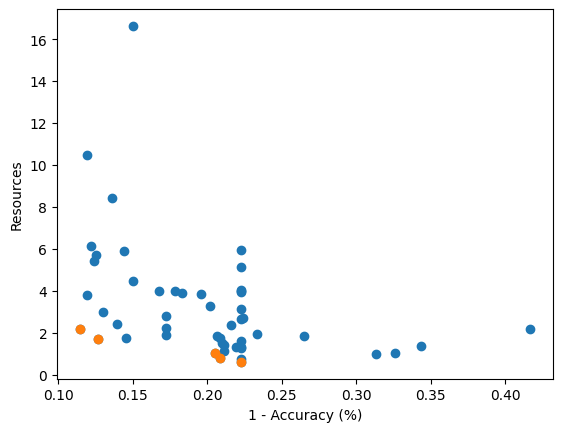

In [23]:
problem.plot_parento_front()

In [25]:
problem.get_opt_solutions()

array([[0.87304075, 1.68303977],
       [0.79153605, 0.79579545],
       [0.88557994, 2.16551136],
       [0.79467085, 1.0396875 ],
       [0.77742947, 0.61414773]])

### Run DSE on models with available parameters and solutions

In [27]:
from tensorflow.keras.models import load_model
from qkeras.utils import _add_supported_quantized_objects
import qkeras.qtools.qtools_util
import qkeras.estimate
loaded_models = []
co = {}
_add_supported_quantized_objects(co)
for model_no in range(pop_size):

#loaded_models.append(load_model(dirname + "/prec_" + str(pre) + "/model_" + str(model_no) + '/KERAS_check_best_model.h5', custom_objects=co))
#model = 
    loaded_models.append(load_model(dirname + str(model_no) + "/KERAS_check_best_model.h5",custom_objects=co))

/home/dmitsas/anaconda3/envs/hls4ml-tutorial/lib/python3.10/site-packages/keras/initializers/initializers_v2.py:120: UserWarning: The initializer LecunUniform is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


In [28]:
reload(est)
import pymoo_utils
reload(pymoo_utils)
reload(dse)


<module 'dse' from '/home/dmitsas/Downloads/backup/src/dse.py'>

In [29]:
def recover_pymoo(dirname,pop_size,):
    par = [[] for x in range(pop_size)]
    #par = []
    for i in range(pop_size):
        with open(dirname + str(i) + "/parameters.txt",'r') as f:
            for lines in f:

                par[i].append(lines)
                
    par = np.array(par)

    x = []
    for i in range(pop_size):
        s = par[i,0].split(" ")
        s = np.array(s)
        s = s.astype(float).astype(int)
        x.append(s)
    x = np.array(x)

    acc = [[] for x in range(pop_size)]
    #par = []
    for i in range(pop_size):
        with open(dirname + str(i) + "/accuracy.txt",'r') as f:
            for lines in f:
                acc[i].append(lines)           
    acc = np.array(acc)
    f1 = []
    for i in range(pop_size):
        s = acc[i,0]
        s = np.array(s)
        s = s.astype(float)
        f1.append(s)
    f1 = np.array(f1)


    size = [[] for x in range(pop_size)]
    for i in range(pop_size):
        with open(dirname + str(i) + '/reuse_' + str(RF) + "/size.txt",'r') as f:
            for lines in f:
                size[i].append(lines)

    size = np.array(size)
    f2 = []
    for i in range(pop_size):
        s = size[i,0]
        s = np.array(s)
        s = s.astype(float)
        f2.append(s)
    f2 = np.array(f2)
    f2.shape

    f = np.concatenate(([f1],[f2]))
    return x,f

In [30]:
RF = 1

In [32]:
########### User setup ################
###########This is used when the population is already available ##########
#dirname = "./dse_models/models_8" + "/model_"
#dirname = "./dse_models/models_car_2/" +"model_"
pop_size = 50
x,f = recover_pymoo(dirname,pop_size)
#RF=10
layer_in = 16
layer_out = 5
#algorithm = NSGA2(pop_size = pop_size,sampling=x)
problem = dse.dse(layer_in,layer_out,X_train,X_test,Y_train,Y_test,jet_comp.compare_data,population=f,parameters=x,dirname=dirname,only_est=True,models=loaded_models,reuse=RF,device = "Z7020")


In [33]:
%%time
res = problem.minimize(problem,pop_size,('n_gen',1),seed=1)
#np.savetxt(dirname + "/reuse_" + str(RF) + "\results.txt",problem.get_opt_solutions())

... quantizing model
... quantizing model
... quantizing model
... quantizing model


/home/dmitsas/.local/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LinearRegression from version 1.2.2 when using version 1.4.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/dmitsas/.local/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LinearRegression from version 1.2.2 when using version 1.4.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/dmitsas/.local/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LinearRegression from version 1.2.2 when using version 1.4.2. 

-----------------------------------------------------------
... quantizing model
... quantizing model
... quantizing model
... quantizing model


/home/dmitsas/.local/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LinearRegression from version 1.2.2 when using version 1.4.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/dmitsas/.local/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LinearRegression from version 1.2.2 when using version 1.4.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/dmitsas/.local/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LinearRegression from version 1.2.2 when using version 1.4.2. 

-----------------------------------------------------------
... quantizing model
... quantizing model
... quantizing model


/home/dmitsas/.local/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LinearRegression from version 1.2.2 when using version 1.4.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/dmitsas/.local/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LinearRegression from version 1.2.2 when using version 1.4.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/dmitsas/.local/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LinearRegression from version 1.2.2 when using version 1.4.2. 

... quantizing model
-----------------------------------------------------------
... quantizing model
... quantizing model


/home/dmitsas/.local/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LinearRegression from version 1.2.2 when using version 1.4.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/dmitsas/.local/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LinearRegression from version 1.2.2 when using version 1.4.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/dmitsas/.local/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LinearRegression from version 1.2.2 when using version 1.4.2. 

... quantizing model
... quantizing model
-----------------------------------------------------------
... quantizing model
... quantizing model
... quantizing model


/home/dmitsas/.local/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LinearRegression from version 1.2.2 when using version 1.4.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/dmitsas/.local/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LinearRegression from version 1.2.2 when using version 1.4.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/dmitsas/.local/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LinearRegression from version 1.2.2 when using version 1.4.2. 

... quantizing model
-----------------------------------------------------------
... quantizing model
... quantizing model
... quantizing model


/home/dmitsas/.local/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LinearRegression from version 1.2.2 when using version 1.4.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/dmitsas/.local/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LinearRegression from version 1.2.2 when using version 1.4.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/dmitsas/.local/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LinearRegression from version 1.2.2 when using version 1.4.2. 

... quantizing model
-----------------------------------------------------------
... quantizing model
... quantizing model
... quantizing model


/home/dmitsas/.local/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LinearRegression from version 1.2.2 when using version 1.4.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/dmitsas/.local/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LinearRegression from version 1.2.2 when using version 1.4.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/dmitsas/.local/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LinearRegression from version 1.2.2 when using version 1.4.2. 

... quantizing model
-----------------------------------------------------------
... quantizing model
... quantizing model
... quantizing model
... quantizing model


/home/dmitsas/.local/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LinearRegression from version 1.2.2 when using version 1.4.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/dmitsas/.local/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LinearRegression from version 1.2.2 when using version 1.4.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/dmitsas/.local/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LinearRegression from version 1.2.2 when using version 1.4.2. 

-----------------------------------------------------------
... quantizing model
... quantizing model
... quantizing model


/home/dmitsas/.local/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LinearRegression from version 1.2.2 when using version 1.4.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/dmitsas/.local/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LinearRegression from version 1.2.2 when using version 1.4.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/dmitsas/.local/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LinearRegression from version 1.2.2 when using version 1.4.2. 

... quantizing model
-----------------------------------------------------------
... quantizing model
... quantizing model
... quantizing model
... quantizing model


/home/dmitsas/.local/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LinearRegression from version 1.2.2 when using version 1.4.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/dmitsas/.local/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LinearRegression from version 1.2.2 when using version 1.4.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/dmitsas/.local/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LinearRegression from version 1.2.2 when using version 1.4.2. 

-----------------------------------------------------------
... quantizing model
... quantizing model
... quantizing model
... quantizing model
-----------------------------------------------------------
... quantizing model


/home/dmitsas/.local/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LinearRegression from version 1.2.2 when using version 1.4.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/dmitsas/.local/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LinearRegression from version 1.2.2 when using version 1.4.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/dmitsas/.local/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LinearRegression from version 1.2.2 when using version 1.4.2. 

... quantizing model
... quantizing model
... quantizing model
-----------------------------------------------------------
... quantizing model
... quantizing model


/home/dmitsas/.local/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LinearRegression from version 1.2.2 when using version 1.4.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/dmitsas/.local/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LinearRegression from version 1.2.2 when using version 1.4.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/dmitsas/.local/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LinearRegression from version 1.2.2 when using version 1.4.2. 

... quantizing model
... quantizing model
-----------------------------------------------------------
... quantizing model
... quantizing model
... quantizing model


/home/dmitsas/.local/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LinearRegression from version 1.2.2 when using version 1.4.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/dmitsas/.local/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LinearRegression from version 1.2.2 when using version 1.4.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/dmitsas/.local/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LinearRegression from version 1.2.2 when using version 1.4.2. 

... quantizing model
-----------------------------------------------------------
... quantizing model
... quantizing model
... quantizing model
... quantizing model
-----------------------------------------------------------
... quantizing model
... quantizing model
... quantizing model
... quantizing model
-----------------------------------------------------------
... quantizing model


/home/dmitsas/.local/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LinearRegression from version 1.2.2 when using version 1.4.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/dmitsas/.local/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LinearRegression from version 1.2.2 when using version 1.4.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/dmitsas/.local/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LinearRegression from version 1.2.2 when using version 1.4.2. 

... quantizing model
... quantizing model
... quantizing model
-----------------------------------------------------------
... quantizing model
... quantizing model
... quantizing model


/home/dmitsas/.local/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LinearRegression from version 1.2.2 when using version 1.4.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/dmitsas/.local/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LinearRegression from version 1.2.2 when using version 1.4.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/dmitsas/.local/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LinearRegression from version 1.2.2 when using version 1.4.2. 

... quantizing model
-----------------------------------------------------------
... quantizing model
... quantizing model
... quantizing model
... quantizing model
-----------------------------------------------------------
... quantizing model


/home/dmitsas/.local/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LinearRegression from version 1.2.2 when using version 1.4.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/dmitsas/.local/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LinearRegression from version 1.2.2 when using version 1.4.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/dmitsas/.local/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LinearRegression from version 1.2.2 when using version 1.4.2. 

... quantizing model
... quantizing model
... quantizing model
-----------------------------------------------------------
... quantizing model
... quantizing model
... quantizing model
... quantizing model


/home/dmitsas/.local/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LinearRegression from version 1.2.2 when using version 1.4.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/dmitsas/.local/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LinearRegression from version 1.2.2 when using version 1.4.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/dmitsas/.local/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LinearRegression from version 1.2.2 when using version 1.4.2. 

-----------------------------------------------------------
... quantizing model
... quantizing model
... quantizing model
... quantizing model
-----------------------------------------------------------
... quantizing model
... quantizing model


/home/dmitsas/.local/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LinearRegression from version 1.2.2 when using version 1.4.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/dmitsas/.local/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LinearRegression from version 1.2.2 when using version 1.4.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/dmitsas/.local/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LinearRegression from version 1.2.2 when using version 1.4.2. 

... quantizing model
... quantizing model
-----------------------------------------------------------
... quantizing model
... quantizing model
... quantizing model
... quantizing model


/home/dmitsas/.local/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LinearRegression from version 1.2.2 when using version 1.4.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/dmitsas/.local/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LinearRegression from version 1.2.2 when using version 1.4.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/dmitsas/.local/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LinearRegression from version 1.2.2 when using version 1.4.2. 

-----------------------------------------------------------
... quantizing model
... quantizing model
... quantizing model
... quantizing model
-----------------------------------------------------------
... quantizing model
... quantizing model


/home/dmitsas/.local/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LinearRegression from version 1.2.2 when using version 1.4.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/dmitsas/.local/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LinearRegression from version 1.2.2 when using version 1.4.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/dmitsas/.local/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LinearRegression from version 1.2.2 when using version 1.4.2. 

... quantizing model
... quantizing model
-----------------------------------------------------------
... quantizing model
... quantizing model
... quantizing model


/home/dmitsas/.local/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LinearRegression from version 1.2.2 when using version 1.4.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/dmitsas/.local/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LinearRegression from version 1.2.2 when using version 1.4.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/dmitsas/.local/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LinearRegression from version 1.2.2 when using version 1.4.2. 

... quantizing model
-----------------------------------------------------------
... quantizing model
... quantizing model
... quantizing model
... quantizing model


/home/dmitsas/.local/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LinearRegression from version 1.2.2 when using version 1.4.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/dmitsas/.local/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LinearRegression from version 1.2.2 when using version 1.4.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/dmitsas/.local/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LinearRegression from version 1.2.2 when using version 1.4.2. 

-----------------------------------------------------------
... quantizing model
... quantizing model
... quantizing model
... quantizing model
-----------------------------------------------------------
... quantizing model


/home/dmitsas/.local/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LinearRegression from version 1.2.2 when using version 1.4.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/dmitsas/.local/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LinearRegression from version 1.2.2 when using version 1.4.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/dmitsas/.local/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LinearRegression from version 1.2.2 when using version 1.4.2. 

... quantizing model
... quantizing model
... quantizing model
-----------------------------------------------------------
... quantizing model
... quantizing model
... quantizing model


/home/dmitsas/.local/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LinearRegression from version 1.2.2 when using version 1.4.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/dmitsas/.local/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LinearRegression from version 1.2.2 when using version 1.4.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/dmitsas/.local/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LinearRegression from version 1.2.2 when using version 1.4.2. 

... quantizing model
-----------------------------------------------------------
... quantizing model
... quantizing model
... quantizing model
... quantizing model
-----------------------------------------------------------
... quantizing model


/home/dmitsas/.local/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LinearRegression from version 1.2.2 when using version 1.4.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/dmitsas/.local/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LinearRegression from version 1.2.2 when using version 1.4.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/dmitsas/.local/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LinearRegression from version 1.2.2 when using version 1.4.2. 

... quantizing model
... quantizing model
... quantizing model
-----------------------------------------------------------
... quantizing model
... quantizing model
... quantizing model


/home/dmitsas/.local/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LinearRegression from version 1.2.2 when using version 1.4.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/dmitsas/.local/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LinearRegression from version 1.2.2 when using version 1.4.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/dmitsas/.local/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LinearRegression from version 1.2.2 when using version 1.4.2. 

... quantizing model
-----------------------------------------------------------
... quantizing model
... quantizing model
... quantizing model
... quantizing model
-----------------------------------------------------------
... quantizing model


/home/dmitsas/.local/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LinearRegression from version 1.2.2 when using version 1.4.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/dmitsas/.local/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LinearRegression from version 1.2.2 when using version 1.4.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/dmitsas/.local/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LinearRegression from version 1.2.2 when using version 1.4.2. 

... quantizing model
... quantizing model
... quantizing model
-----------------------------------------------------------
... quantizing model


/home/dmitsas/.local/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LinearRegression from version 1.2.2 when using version 1.4.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/dmitsas/.local/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LinearRegression from version 1.2.2 when using version 1.4.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/dmitsas/.local/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LinearRegression from version 1.2.2 when using version 1.4.2. 

... quantizing model
... quantizing model
... quantizing model
-----------------------------------------------------------
... quantizing model
... quantizing model


/home/dmitsas/.local/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LinearRegression from version 1.2.2 when using version 1.4.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/dmitsas/.local/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LinearRegression from version 1.2.2 when using version 1.4.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/dmitsas/.local/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LinearRegression from version 1.2.2 when using version 1.4.2. 

... quantizing model
... quantizing model
-----------------------------------------------------------
... quantizing model
... quantizing model
... quantizing model
... quantizing model
-----------------------------------------------------------
... quantizing model


/home/dmitsas/.local/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LinearRegression from version 1.2.2 when using version 1.4.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/dmitsas/.local/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LinearRegression from version 1.2.2 when using version 1.4.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/dmitsas/.local/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LinearRegression from version 1.2.2 when using version 1.4.2. 

... quantizing model
... quantizing model
... quantizing model
-----------------------------------------------------------
... quantizing model
... quantizing model
... quantizing model


/home/dmitsas/.local/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LinearRegression from version 1.2.2 when using version 1.4.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/dmitsas/.local/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LinearRegression from version 1.2.2 when using version 1.4.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/dmitsas/.local/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LinearRegression from version 1.2.2 when using version 1.4.2. 

... quantizing model
-----------------------------------------------------------
... quantizing model
... quantizing model
... quantizing model
... quantizing model


/home/dmitsas/.local/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LinearRegression from version 1.2.2 when using version 1.4.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/dmitsas/.local/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LinearRegression from version 1.2.2 when using version 1.4.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/dmitsas/.local/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LinearRegression from version 1.2.2 when using version 1.4.2. 

-----------------------------------------------------------
... quantizing model
... quantizing model
... quantizing model
... quantizing model
-----------------------------------------------------------
... quantizing model
... quantizing model


/home/dmitsas/.local/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LinearRegression from version 1.2.2 when using version 1.4.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/dmitsas/.local/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LinearRegression from version 1.2.2 when using version 1.4.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/dmitsas/.local/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LinearRegression from version 1.2.2 when using version 1.4.2. 

... quantizing model
... quantizing model
-----------------------------------------------------------
... quantizing model
... quantizing model
... quantizing model


/home/dmitsas/.local/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LinearRegression from version 1.2.2 when using version 1.4.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/dmitsas/.local/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LinearRegression from version 1.2.2 when using version 1.4.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/dmitsas/.local/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LinearRegression from version 1.2.2 when using version 1.4.2. 

... quantizing model
-----------------------------------------------------------
... quantizing model
... quantizing model
... quantizing model
... quantizing model
-----------------------------------------------------------
... quantizing model


/home/dmitsas/.local/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LinearRegression from version 1.2.2 when using version 1.4.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/dmitsas/.local/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LinearRegression from version 1.2.2 when using version 1.4.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/dmitsas/.local/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LinearRegression from version 1.2.2 when using version 1.4.2. 

... quantizing model
... quantizing model
... quantizing model
-----------------------------------------------------------
... quantizing model
... quantizing model
... quantizing model


/home/dmitsas/.local/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LinearRegression from version 1.2.2 when using version 1.4.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/dmitsas/.local/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LinearRegression from version 1.2.2 when using version 1.4.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/dmitsas/.local/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LinearRegression from version 1.2.2 when using version 1.4.2. 

... quantizing model
-----------------------------------------------------------
... quantizing model
... quantizing model
... quantizing model


/home/dmitsas/.local/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LinearRegression from version 1.2.2 when using version 1.4.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/dmitsas/.local/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LinearRegression from version 1.2.2 when using version 1.4.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/dmitsas/.local/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LinearRegression from version 1.2.2 when using version 1.4.2. 

... quantizing model
-----------------------------------------------------------
... quantizing model
... quantizing model
... quantizing model
... quantizing model
-----------------------------------------------------------
CPU times: user 8.94 s, sys: 59.3 ms, total: 9 s
Wall time: 9.07 s


In [34]:
dirname

'./dse_models/models_11/model_'

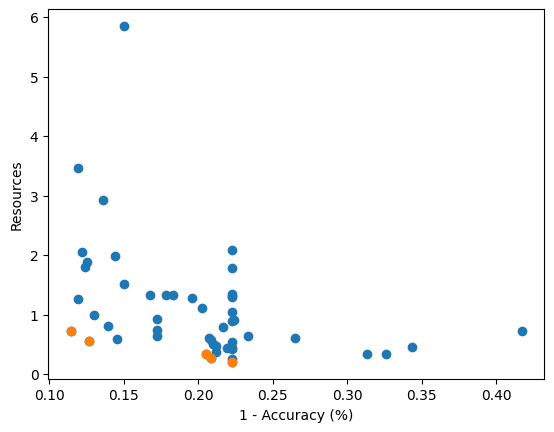

In [35]:
problem.plot_parento_front()

In [38]:
problem.get_fitting_solutions()

array([[0.87304075, 0.55679511],
       [0.79153605, 0.26327068],
       [0.88557994, 0.71640977],
       [0.79467085, 0.34395677],
       [0.77742947, 0.20317669]])